# CHILDES Chinese: Age vs Function Word Proportion

In [13]:
import os
import csv
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [14]:
# List of CSV files to process
function_files_50 = ['Kang_function50.csv', 'Laohu_function50.csv', 'Peng_function50.csv', 'Zhong_function50.csv', 'Cheng_function50.csv', 'Chou_function50.csv', 'Chw_function50.csv', 'Jc_function50.csv', 'Pan_function50.csv', 'Wang_function50.csv', 'Wu_function50.csv', 'Wuys_function50.csv', 'Xu_function50.csv', 'Yang_function50.csv', 'Tong_function50.csv', 'Zhou3_function50.csv']  # Uses _function50.csv files
function_files_100 = ['Kang_function100.csv', 'Laohu_function100.csv', 'Peng_function100.csv', 'Zhong_function100.csv', 'Cheng_function100.csv', 'Chou_function100.csv', 'Chw_function100.csv', 'Jc_function100.csv', 'Pan_function100.csv', 'Wang_function100.csv', 'Wu_function100.csv', 'Wuys_function100.csv', 'Xu_function100.csv', 'Yang_function100.csv', 'Tong_function100.csv', 'Zhou3_function100.csv']  # Uses _function100.csv files
function_files_all = ['Kang_function.csv', 'Laohu_function.csv', 'Peng_function.csv', 'Zhong_function.csv', 'Cheng_function.csv', 'Chou_function.csv', 'Chw_function.csv', 'Jc_function.csv', 'Pan_function.csv', 'Wang_function.csv', 'Wu_function.csv', 'Wuys_function.csv', 'Xu_function.csv', 'Yang_function.csv', 'Tong_function.csv', 'Zhou3_function.csv']  # Uses _function.csv files

# Initialize a 2D array to store Spearman's rho values for each CSV file
spearman_rhos_50 = []
spearman_rhos_100 = []
spearman_rhos_all = []

# Load the original _mlu.csv files to get ages (they are the only files that have the corresponding ages for each transcript)
age_files = ['Kang_mlu.csv', 'Laohu_mlu.csv', 'Peng_mlu.csv', 'Zhong_mlu.csv', 'Cheng_mlu.csv', 'Chou_mlu.csv', 'Chw_mlu.csv', 'Jc_mlu.csv', 'Pan_mlu.csv', 'Wang_mlu.csv', 'Wu_mlu.csv', 'Wuys_mlu.csv', 'Xu_mlu.csv', 'Yang_mlu.csv', 'Tong_mlu.csv', 'Zhou3_mlu.csv']

In [15]:
def age_in_months(age_str):
    parts = age_str.split(';')
    if len(parts) == 2:  # Example Format: "2;11.28", "2;05.", or "3;"
        years = int(parts[0])
        months_and_days = parts[1].split('.')
        
        # Handle cases where days are not provided
        if months_and_days[0] == '':
            months = 0  # Assume 00 months if no months are provided
        else:
            months = float(months_and_days[0])
        
        # Check if the month format ends with a dot, indicating missing days
        if len(months_and_days) > 1 and months_and_days[1] == '':
            days = 0  # Assume 00 days if no days are provided
        else:
            days = float(months_and_days[1]) if len(months_and_days) > 1 else 0
        
        months += days / 30  # Keep decimal for days
        return years * 12 + months
    return 0  # Consider raising an error instead of returning 0 for invalid formats

In [16]:
def age_function_plots(function_files, spearman_rhos, age_files):
    age_data = {}

    for age_file in age_files:
        if os.path.exists(age_file):
            with open(age_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)
                # Store ages in a dictionary with the base filename as the key
                for entry in data:
                    base_filename = entry['File'].split('.')[0]  # Get the base filename
                    age_data[base_filename] = age_in_months(entry['Age'])  # Store the age

    for function_file in function_files:
        # Check if the file exists before attempting to open it
        if os.path.exists(function_file):
            with open(function_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)

            # Initialize list to hold chosen transcripts and their function word proportions
            chosen_transcripts = []
            transcript_list = []
            time_steps = []  # New list to hold time steps

            # Select the first transcript
            if data:  # Check if there is any data
                first_data = data[0]
                # Extract the base filename to get the corresponding age
                base_filename = first_data['File'].split('.')[0]
                first_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                chosen_transcripts.append((first_age, float(first_data['Function Word Proportion'])))
                transcript_list.append(first_data['File'])  # Collect the first transcript name

                last_chosen_age = first_age

                # Select subsequent transcripts that are at least 1 month apart
                for entry in data[1:]:  # Start from the second transcript
                    base_filename = entry['File'].split('.')[0]
                    current_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                    if current_age - last_chosen_age >= 1:
                        chosen_transcripts.append((current_age, float(entry['Function Word Proportion'])))  # Collect age and function word proportion
                        transcript_list.append(entry['File'])  # Collect the transcript name
                        time_steps.append(current_age - last_chosen_age)  # Calculate time step without rounding
                        last_chosen_age = current_age

            # Plot Age vs Function Word Proportion
            ages = [t[0] for t in chosen_transcripts]
            function_word_proportions = [t[1] for t in chosen_transcripts]

            plt.figure(figsize=(10, 5))
            plt.scatter(ages, function_word_proportions, marker='o')  # scatter plot
            plt.title(f'Age vs Function Word Proportion for {function_file}')
            plt.xlabel('Age (months)')
            plt.ylabel('Function Word Proportion')
            plt.grid()
            plt.show()       

            # Calculate Spearman's rho
            if len(ages) > 1:  # Ensure there are enough data points
                spearman_corr, _ = spearmanr(ages, function_word_proportions)
                spearman_rhos.append([function_file, spearman_corr])  # Store the file name and Spearman's rho value
                print(f"Spearman's rho for {function_file}: {spearman_corr:.4f}\n")

            # Print the list of chosen transcripts, converted ages, and time steps
            print(f"Chosen Transcripts for {function_file}: \n", transcript_list, "\n")
            print(f"Function Word Proportions for {function_file}: \n", function_word_proportions, "\n")  # Print the function word proportions
            print(f"Ages for {function_file}: \n", ages, "\n")  # Print the converted ages
            print(f"Time Steps for {function_file}: \n", time_steps, "\n")  # Print the time steps

## Age vs Function Word Proportion (50 Utterances)

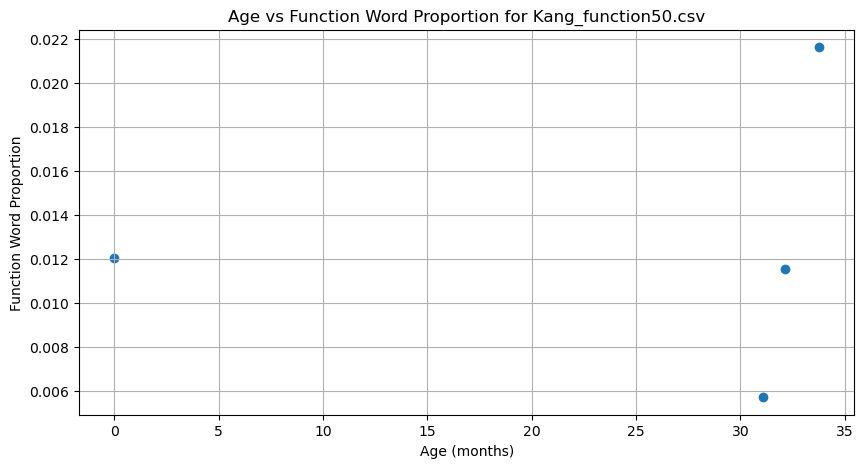

Spearman's rho for Kang_function50.csv: 0.4000

Chosen Transcripts for Kang_function50.csv: 
 ['01.ipcore.cex', '02.ipcore.cex', '19.ipcore.cex', '21.ipcore.cex'] 

Function Word Proportions for Kang_function50.csv: 
 [0.012048192771084338, 0.005714285714285714, 0.011560693641618497, 0.021621621621621623] 

Ages for Kang_function50.csv: 
 [0, 31.066666666666666, 32.13333333333333, 33.766666666666666] 

Time Steps for Kang_function50.csv: 
 [31.066666666666666, 1.0666666666666664, 1.6333333333333329] 



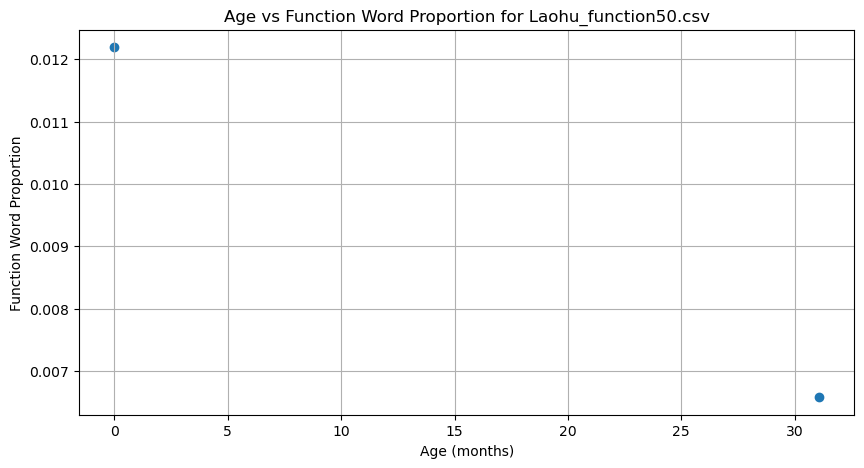

Spearman's rho for Laohu_function50.csv: -1.0000

Chosen Transcripts for Laohu_function50.csv: 
 ['01.ipcore.cex', '02.ipcore.cex'] 

Function Word Proportions for Laohu_function50.csv: 
 [0.012195121951219513, 0.006578947368421052] 

Ages for Laohu_function50.csv: 
 [0, 31.066666666666666] 

Time Steps for Laohu_function50.csv: 
 [31.066666666666666] 



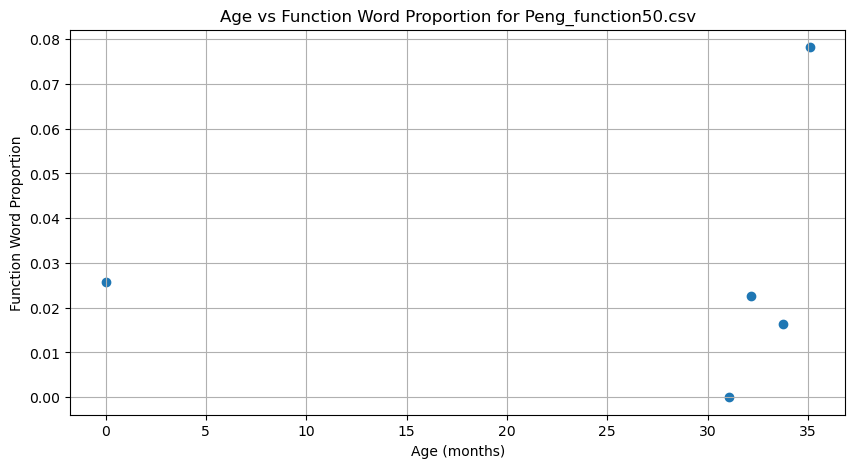

Spearman's rho for Peng_function50.csv: 0.3000

Chosen Transcripts for Peng_function50.csv: 
 ['01.ipcore.cex', '02.ipcore.cex', '19.ipcore.cex', '21.ipcore.cex', '24.ipcore.cex'] 

Function Word Proportions for Peng_function50.csv: 
 [0.025806451612903226, 0.0, 0.022598870056497175, 0.016304347826086956, 0.0782122905027933] 

Ages for Peng_function50.csv: 
 [0, 31.066666666666666, 32.13333333333333, 33.766666666666666, 35.1] 

Time Steps for Peng_function50.csv: 
 [31.066666666666666, 1.0666666666666664, 1.6333333333333329, 1.3333333333333357] 



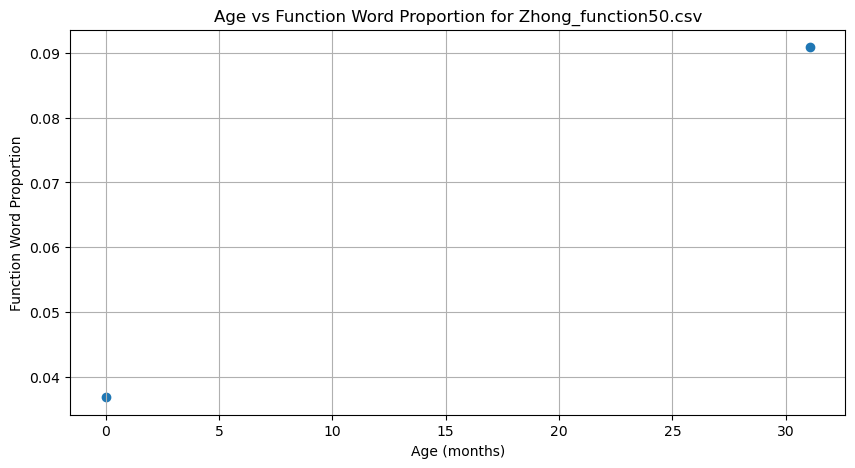

Spearman's rho for Zhong_function50.csv: 1.0000

Chosen Transcripts for Zhong_function50.csv: 
 ['01.ipcore.cex', '02.ipcore.cex'] 

Function Word Proportions for Zhong_function50.csv: 
 [0.03680981595092025, 0.09090909090909091] 

Ages for Zhong_function50.csv: 
 [0, 31.066666666666666] 

Time Steps for Zhong_function50.csv: 
 [31.066666666666666] 



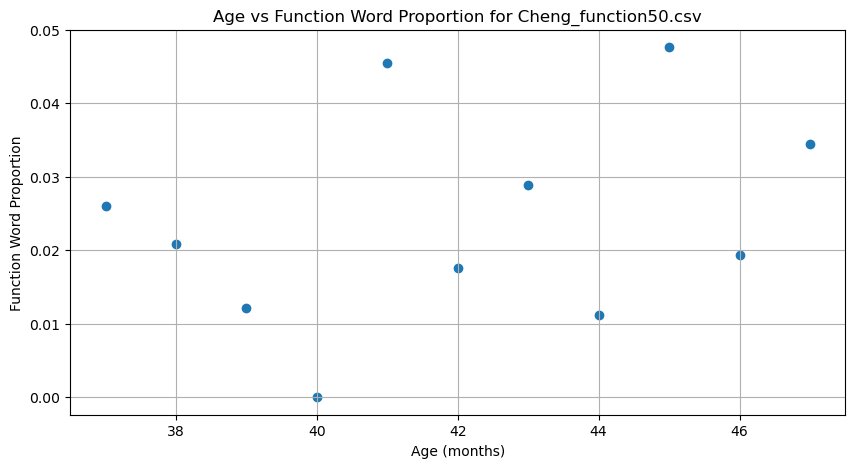

Spearman's rho for Cheng_function50.csv: 0.2727

Chosen Transcripts for Cheng_function50.csv: 
 ['030100.ipcore.cex', '030200.ipcore.cex', '030300.ipcore.cex', '030400.ipcore.cex', '030500.ipcore.cex', '030600.ipcore.cex', '030700.ipcore.cex', '030800.ipcore.cex', '030900.ipcore.cex', '031000.ipcore.cex', '031100.ipcore.cex'] 

Function Word Proportions for Cheng_function50.csv: 
 [0.025974025974025976, 0.020833333333333332, 0.012195121951219513, 0.0, 0.045454545454545456, 0.017543859649122806, 0.028901734104046242, 0.0111731843575419, 0.047619047619047616, 0.01935483870967742, 0.034482758620689655] 

Ages for Cheng_function50.csv: 
 [37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0] 

Time Steps for Cheng_function50.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



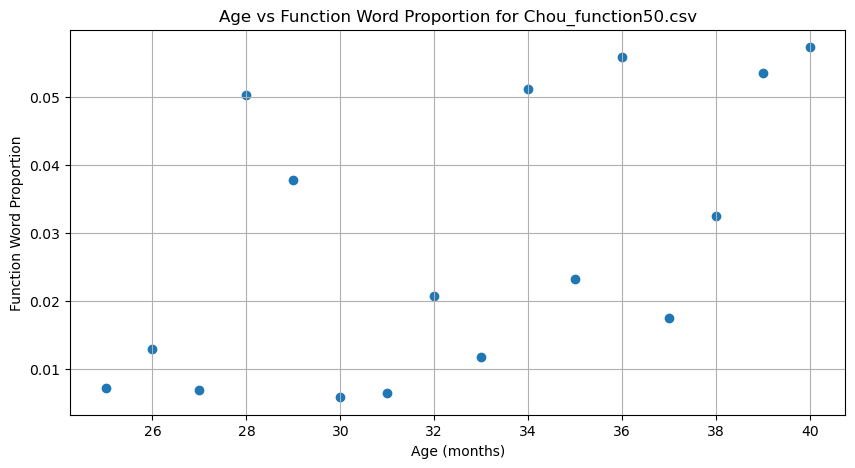

Spearman's rho for Chou_function50.csv: 0.6088

Chosen Transcripts for Chou_function50.csv: 
 ['020100.ipcore.cex', '020200.ipcore.cex', '020300.ipcore.cex', '020400.ipcore.cex', '020500.ipcore.cex', '020600.ipcore.cex', '020700.ipcore.cex', '020800.ipcore.cex', '020900.ipcore.cex', '021000.ipcore.cex', '021100.ipcore.cex', '030000.ipcore.cex', '030100.ipcore.cex', '030200.ipcore.cex', '030300.ipcore.cex', '030400.ipcore.cex'] 

Function Word Proportions for Chou_function50.csv: 
 [0.007142857142857143, 0.012903225806451613, 0.006944444444444444, 0.05027932960893855, 0.03773584905660377, 0.005847953216374269, 0.00641025641025641, 0.020689655172413793, 0.011764705882352941, 0.05113636363636364, 0.023255813953488372, 0.055865921787709494, 0.01744186046511628, 0.032432432432432434, 0.05357142857142857, 0.057291666666666664] 

Ages for Chou_function50.csv: 
 [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0] 

Time Steps for Chou_function50.csv

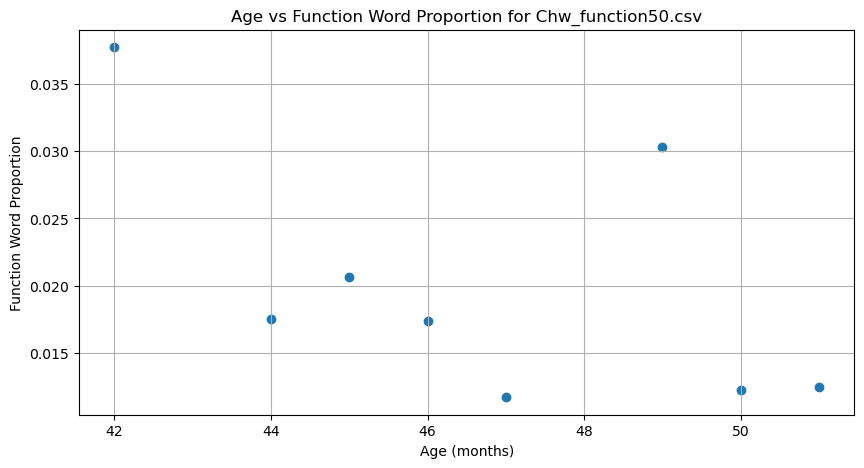

Spearman's rho for Chw_function50.csv: -0.5952

Chosen Transcripts for Chw_function50.csv: 
 ['030600.ipcore.cex', '030800.ipcore.cex', '030900.ipcore.cex', '031000.ipcore.cex', '031100.ipcore.cex', '040100.ipcore.cex', '040200.ipcore.cex', '040300.ipcore.cex'] 

Function Word Proportions for Chw_function50.csv: 
 [0.03773584905660377, 0.017543859649122806, 0.020618556701030927, 0.017341040462427744, 0.011695906432748537, 0.030303030303030304, 0.012269938650306749, 0.012422360248447204] 

Ages for Chw_function50.csv: 
 [42.0, 44.0, 45.0, 46.0, 47.0, 49.0, 50.0, 51.0] 

Time Steps for Chw_function50.csv: 
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0] 



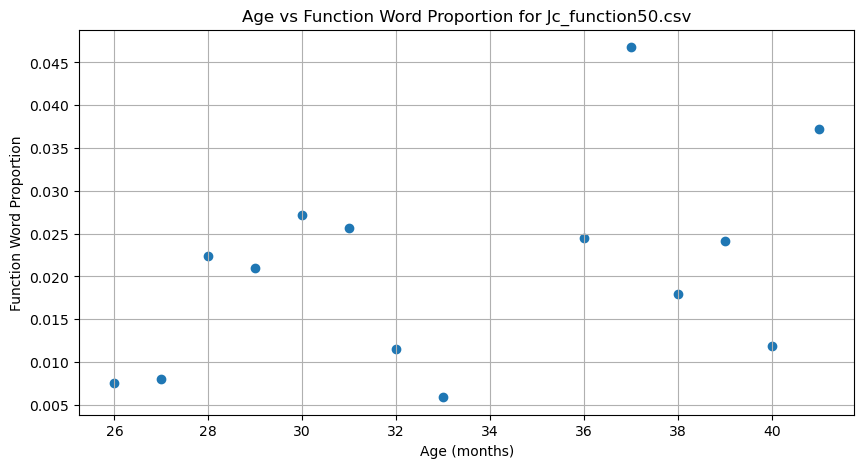

Spearman's rho for Jc_function50.csv: 0.3758

Chosen Transcripts for Jc_function50.csv: 
 ['020200.ipcore.cex', '020300.ipcore.cex', '020400.ipcore.cex', '020500.ipcore.cex', '020600.ipcore.cex', '020700.ipcore.cex', '020800.ipcore.cex', '020900.ipcore.cex', '030000.ipcore.cex', '030100.ipcore.cex', '030200.ipcore.cex', '030300.ipcore.cex', '030400.ipcore.cex', '030500.ipcore.cex'] 

Function Word Proportions for Jc_function50.csv: 
 [0.007575757575757576, 0.008, 0.022388059701492536, 0.02097902097902098, 0.027210884353741496, 0.02564102564102564, 0.011560693641618497, 0.0058823529411764705, 0.024539877300613498, 0.04678362573099415, 0.017964071856287425, 0.024096385542168676, 0.011904761904761904, 0.037267080745341616] 

Ages for Jc_function50.csv: 
 [26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0] 

Time Steps for Jc_function50.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



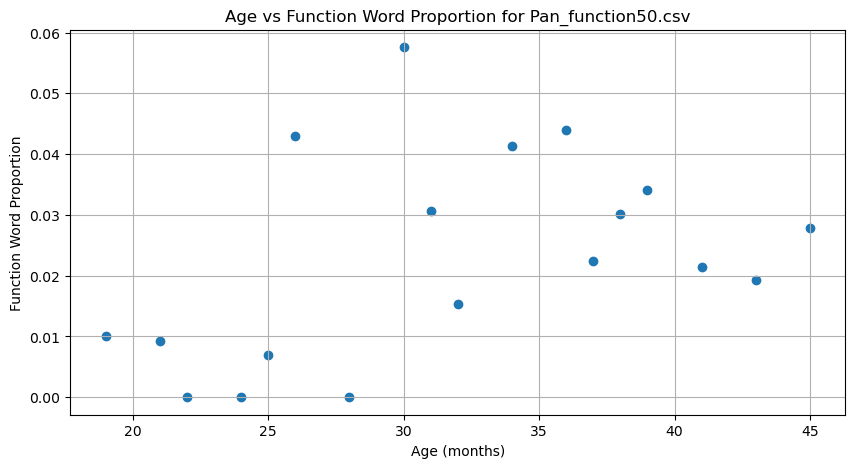

Spearman's rho for Pan_function50.csv: 0.4581

Chosen Transcripts for Pan_function50.csv: 
 ['010700.ipcore.cex', '010900.ipcore.cex', '011000.ipcore.cex', '020000.ipcore.cex', '020100.ipcore.cex', '020200.ipcore.cex', '020400.ipcore.cex', '020600.ipcore.cex', '020700.ipcore.cex', '020800.ipcore.cex', '021000.ipcore.cex', '030000.ipcore.cex', '030100.ipcore.cex', '030200.ipcore.cex', '030300.ipcore.cex', '030500.ipcore.cex', '030700.ipcore.cex', '030900.ipcore.cex'] 

Function Word Proportions for Pan_function50.csv: 
 [0.010101010101010102, 0.009259259259259259, 0.0, 0.0, 0.006896551724137931, 0.04294478527607362, 0.0, 0.05759162303664921, 0.03067484662576687, 0.015306122448979591, 0.04142011834319527, 0.04395604395604396, 0.0223463687150838, 0.03015075376884422, 0.03409090909090909, 0.021505376344086023, 0.01935483870967742, 0.027777777777777776] 

Ages for Pan_function50.csv: 
 [19.0, 21.0, 22.0, 24.0, 25.0, 26.0, 28.0, 30.0, 31.0, 32.0, 34.0, 36.0, 37.0, 38.0, 39.0, 41.0, 43.0, 45.

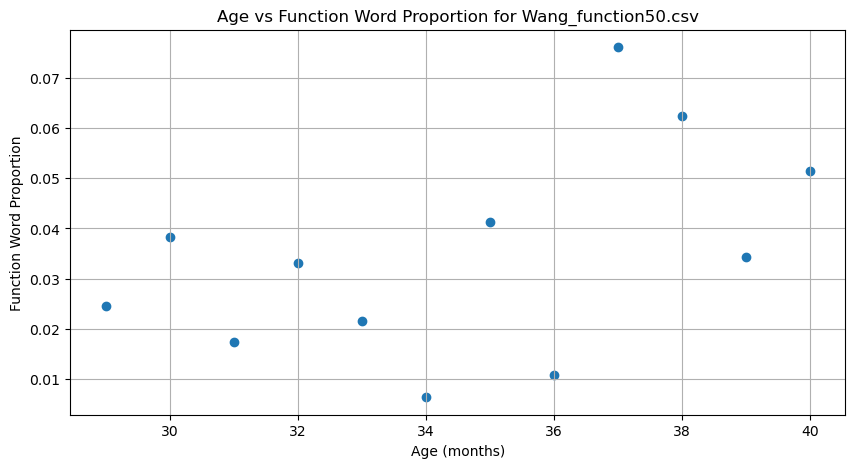

Spearman's rho for Wang_function50.csv: 0.4685

Chosen Transcripts for Wang_function50.csv: 
 ['020500.ipcore.cex', '020600.ipcore.cex', '020700.ipcore.cex', '020800.ipcore.cex', '020900.ipcore.cex', '021000.ipcore.cex', '021100.ipcore.cex', '030000.ipcore.cex', '030100.ipcore.cex', '030200.ipcore.cex', '030300.ipcore.cex', '030400.ipcore.cex'] 

Function Word Proportions for Wang_function50.csv: 
 [0.024539877300613498, 0.03825136612021858, 0.017341040462427744, 0.03314917127071823, 0.021505376344086023, 0.006329113924050633, 0.041237113402061855, 0.010810810810810811, 0.07614213197969544, 0.0625, 0.03428571428571429, 0.05142857142857143] 

Ages for Wang_function50.csv: 
 [29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0] 

Time Steps for Wang_function50.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



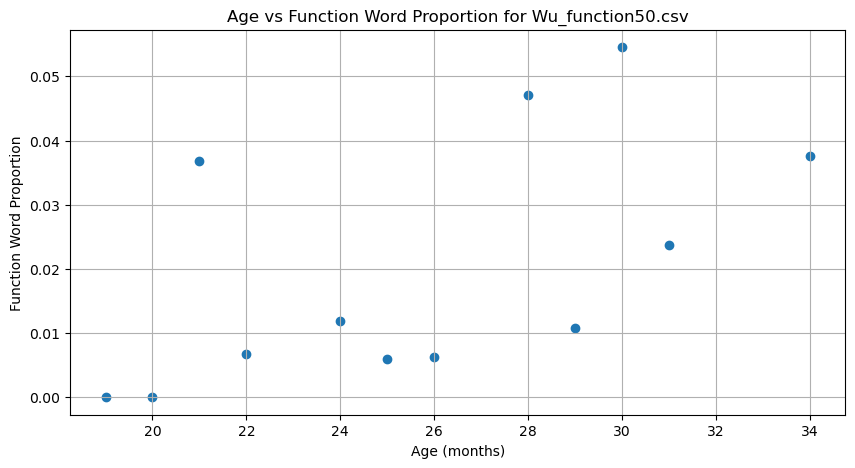

Spearman's rho for Wu_function50.csv: 0.6690

Chosen Transcripts for Wu_function50.csv: 
 ['010700.ipcore.cex', '010800.ipcore.cex', '010900.ipcore.cex', '011000.ipcore.cex', '020000.ipcore.cex', '020100.ipcore.cex', '020200.ipcore.cex', '020400.ipcore.cex', '020500.ipcore.cex', '020600.ipcore.cex', '020700.ipcore.cex', '021000.ipcore.cex'] 

Function Word Proportions for Wu_function50.csv: 
 [0.0, 0.0, 0.03680981595092025, 0.006666666666666667, 0.011834319526627219, 0.006024096385542169, 0.006329113924050633, 0.047058823529411764, 0.010810810810810811, 0.05454545454545454, 0.023668639053254437, 0.03763440860215054] 

Ages for Wu_function50.csv: 
 [19.0, 20.0, 21.0, 22.0, 24.0, 25.0, 26.0, 28.0, 29.0, 30.0, 31.0, 34.0] 

Time Steps for Wu_function50.csv: 
 [1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0] 



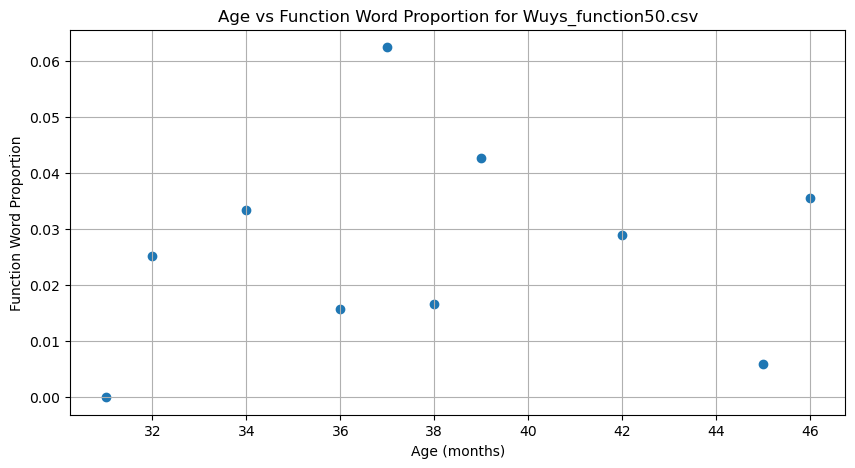

Spearman's rho for Wuys_function50.csv: 0.2970

Chosen Transcripts for Wuys_function50.csv: 
 ['020700.ipcore.cex', '020800.ipcore.cex', '021000.ipcore.cex', '030000.ipcore.cex', '030100.ipcore.cex', '030200.ipcore.cex', '030300.ipcore.cex', '030600.ipcore.cex', '030900.ipcore.cex', '031000.ipcore.cex'] 

Function Word Proportions for Wuys_function50.csv: 
 [0.0, 0.025252525252525252, 0.0335195530726257, 0.015789473684210527, 0.0625, 0.016666666666666666, 0.0427807486631016, 0.028901734104046242, 0.005917159763313609, 0.03553299492385787] 

Ages for Wuys_function50.csv: 
 [31.0, 32.0, 34.0, 36.0, 37.0, 38.0, 39.0, 42.0, 45.0, 46.0] 

Time Steps for Wuys_function50.csv: 
 [1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 3.0, 3.0, 1.0] 



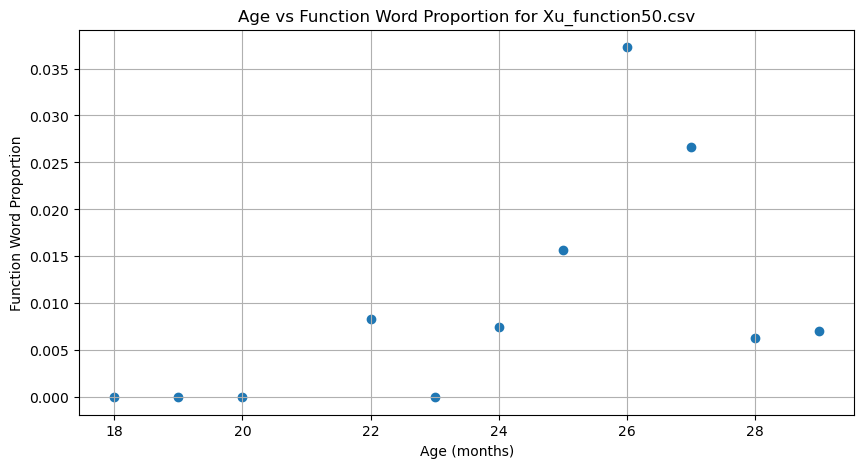

Spearman's rho for Xu_function50.csv: 0.5816

Chosen Transcripts for Xu_function50.csv: 
 ['010600.ipcore.cex', '010700.ipcore.cex', '010800.ipcore.cex', '011000.ipcore.cex', '011100.ipcore.cex', '020000.ipcore.cex', '020100.ipcore.cex', '020200.ipcore.cex', '020300.ipcore.cex', '020400.ipcore.cex', '020500.ipcore.cex'] 

Function Word Proportions for Xu_function50.csv: 
 [0.0, 0.0, 0.0, 0.008333333333333333, 0.0, 0.007462686567164179, 0.015625, 0.037267080745341616, 0.02666666666666667, 0.006329113924050633, 0.007042253521126761] 

Ages for Xu_function50.csv: 
 [18.0, 19.0, 20.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0] 

Time Steps for Xu_function50.csv: 
 [1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



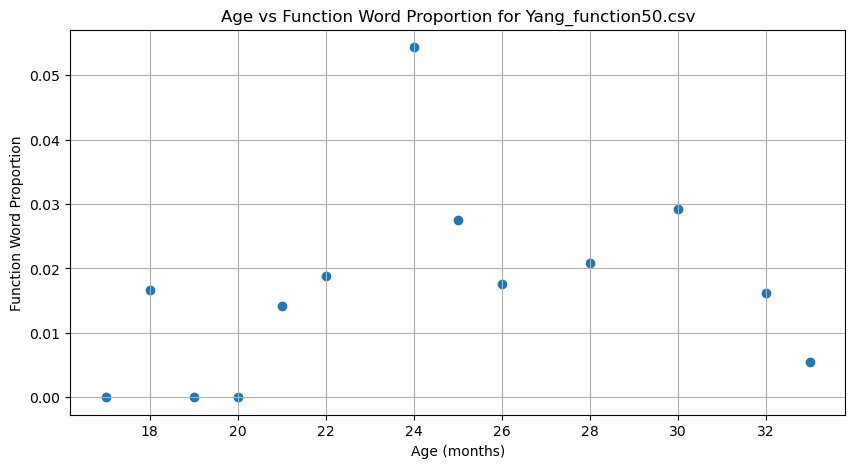

Spearman's rho for Yang_function50.csv: 0.4365

Chosen Transcripts for Yang_function50.csv: 
 ['010500.ipcore.cex', '010600.ipcore.cex', '010700.ipcore.cex', '010800.ipcore.cex', '010900.ipcore.cex', '011000.ipcore.cex', '020000.ipcore.cex', '020100.ipcore.cex', '020200.ipcore.cex', '020400.ipcore.cex', '020600.ipcore.cex', '020800.ipcore.cex', '020900.ipcore.cex'] 

Function Word Proportions for Yang_function50.csv: 
 [0.0, 0.016666666666666666, 0.0, 0.0, 0.014184397163120567, 0.01875, 0.05434782608695652, 0.027472527472527472, 0.017543859649122806, 0.020833333333333332, 0.029239766081871343, 0.016129032258064516, 0.005434782608695652] 

Ages for Yang_function50.csv: 
 [17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 25.0, 26.0, 28.0, 30.0, 32.0, 33.0] 

Time Steps for Yang_function50.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0] 



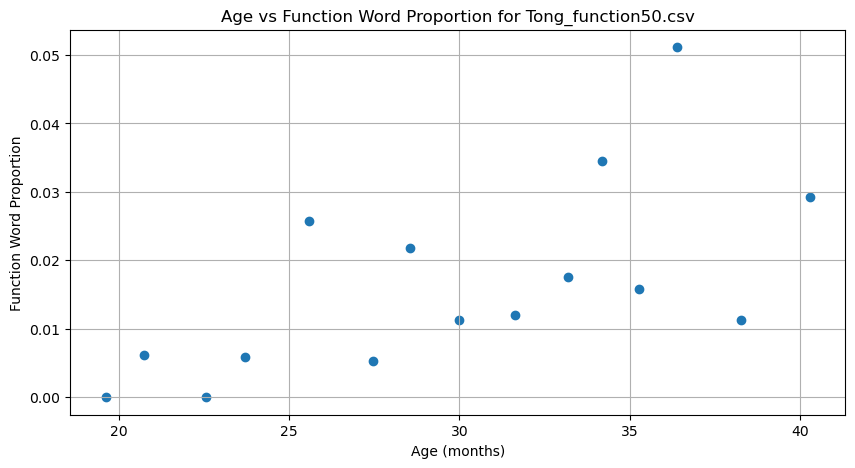

Spearman's rho for Tong_function50.csv: 0.6941

Chosen Transcripts for Tong_function50.csv: 
 ['010718.ipcore.cex', '010822.ipcore.cex', '011017.ipcore.cex', '011121.ipcore.cex', '020117.ipcore.cex', '020314.ipcore.cex', '020416.ipcore.cex', '020530.ipcore.cex', '020719.ipcore.cex', '020906.ipcore.cex', '021006.ipcore.cex', '021108.ipcore.cex', '030012.ipcore.cex', '030208.ipcore.cex', '030409.ipcore.cex'] 

Function Word Proportions for Tong_function50.csv: 
 [0.0, 0.006097560975609756, 0.0, 0.005813953488372093, 0.02577319587628866, 0.0053475935828877, 0.021739130434782608, 0.011299435028248588, 0.011976047904191617, 0.017543859649122806, 0.034482758620689655, 0.015873015873015872, 0.05113636363636364, 0.011299435028248588, 0.02926829268292683] 

Ages for Tong_function50.csv: 
 [19.6, 20.733333333333334, 22.566666666666666, 23.7, 25.566666666666666, 27.46666666666667, 28.53333333333333, 30.0, 31.633333333333333, 33.2, 34.2, 35.266666666666666, 36.4, 38.266666666666666, 40.3] 

Time S

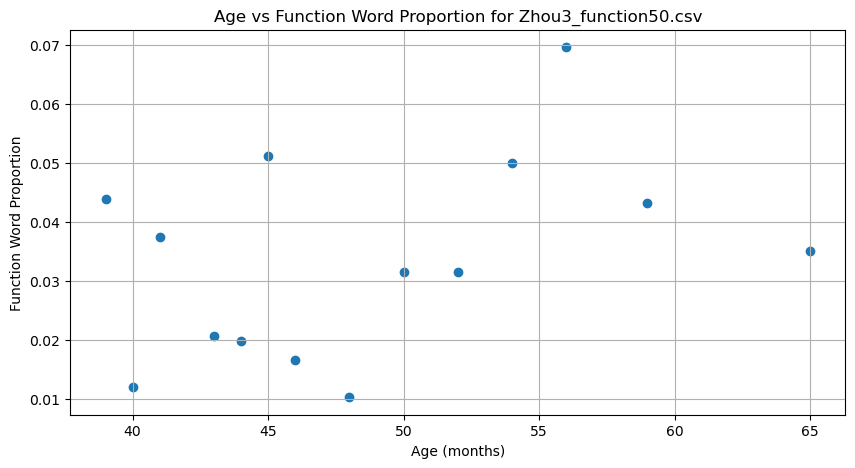

Spearman's rho for Zhou3_function50.csv: 0.2948

Chosen Transcripts for Zhou3_function50.csv: 
 ['000108.ipcore.cex', '000227.ipcore.cex', '000326.ipcore.cex', '000506.ipcore.cex', '000610.ipcore.cex', '000702.ipcore.cex', '000822.ipcore.cex', '001005.ipcore.cex', '001209.ipcore.cex', '010218.ipcore.cex', '010421.ipcore.cex', '010630.ipcore.cex', '010908.ipcore.cex', '020323.ipcore.cex'] 

Function Word Proportions for Zhou3_function50.csv: 
 [0.04395604395604396, 0.011976047904191617, 0.0374331550802139, 0.020618556701030927, 0.019801980198019802, 0.05113636363636364, 0.016574585635359115, 0.010256410256410256, 0.031578947368421054, 0.031578947368421054, 0.05, 0.06965174129353234, 0.04326923076923077, 0.035] 

Ages for Zhou3_function50.csv: 
 [39.0, 40.0, 41.0, 43.0, 44.0, 45.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 59.0, 65.0] 

Time Steps for Zhou3_function50.csv: 
 [1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 6.0] 



In [17]:
age_function_plots(function_files_50, spearman_rhos_50, age_files)

## Age vs Function Word Proportion (100 Utterances)

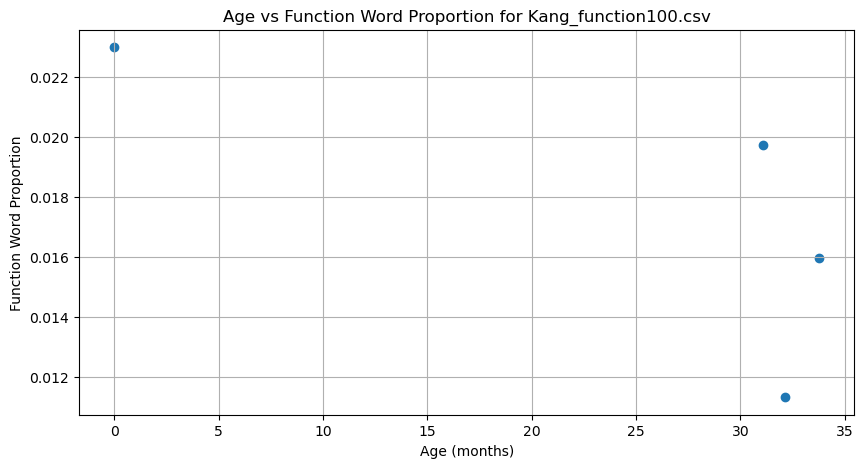

Spearman's rho for Kang_function100.csv: -0.8000

Chosen Transcripts for Kang_function100.csv: 
 ['01.ipcore-100.cex', '02.ipcore-100.cex', '19.ipcore-100.cex', '21.ipcore-100.cex'] 

Function Word Proportions for Kang_function100.csv: 
 [0.022988505747126436, 0.01971830985915493, 0.0113314447592068, 0.015957446808510637] 

Ages for Kang_function100.csv: 
 [0, 31.066666666666666, 32.13333333333333, 33.766666666666666] 

Time Steps for Kang_function100.csv: 
 [31.066666666666666, 1.0666666666666664, 1.6333333333333329] 



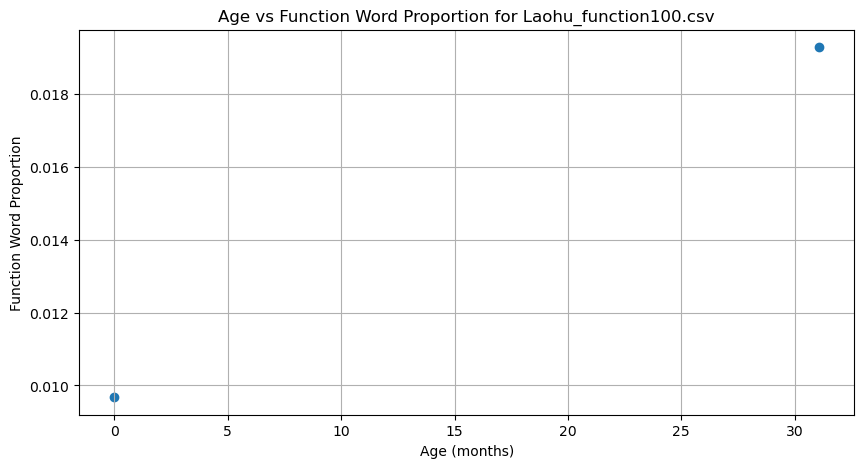

Spearman's rho for Laohu_function100.csv: 1.0000

Chosen Transcripts for Laohu_function100.csv: 
 ['01.ipcore-100.cex', '02.ipcore-100.cex'] 

Function Word Proportions for Laohu_function100.csv: 
 [0.00967741935483871, 0.01929260450160772] 

Ages for Laohu_function100.csv: 
 [0, 31.066666666666666] 

Time Steps for Laohu_function100.csv: 
 [31.066666666666666] 



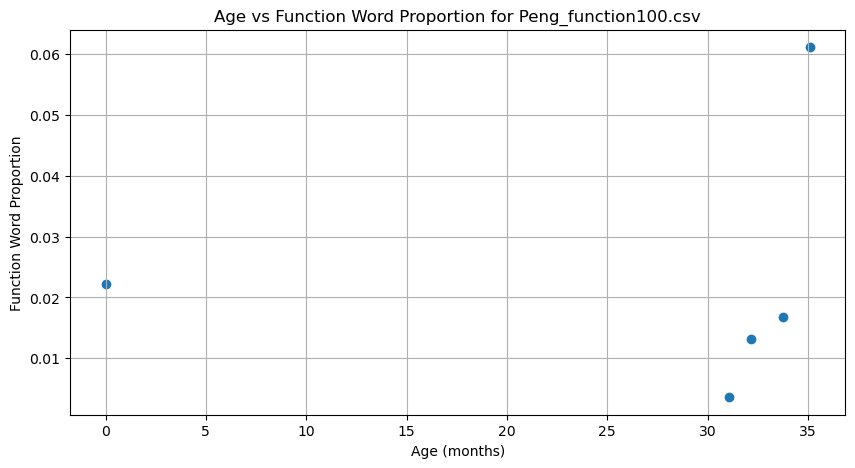

Spearman's rho for Peng_function100.csv: 0.4000

Chosen Transcripts for Peng_function100.csv: 
 ['01.ipcore-100.cex', '02.ipcore-100.cex', '19.ipcore-100.cex', '21.ipcore-100.cex', '24.ipcore-100.cex'] 

Function Word Proportions for Peng_function100.csv: 
 [0.022151898734177215, 0.0035714285714285713, 0.013192612137203167, 0.016713091922005572, 0.061170212765957445] 

Ages for Peng_function100.csv: 
 [0, 31.066666666666666, 32.13333333333333, 33.766666666666666, 35.1] 

Time Steps for Peng_function100.csv: 
 [31.066666666666666, 1.0666666666666664, 1.6333333333333329, 1.3333333333333357] 



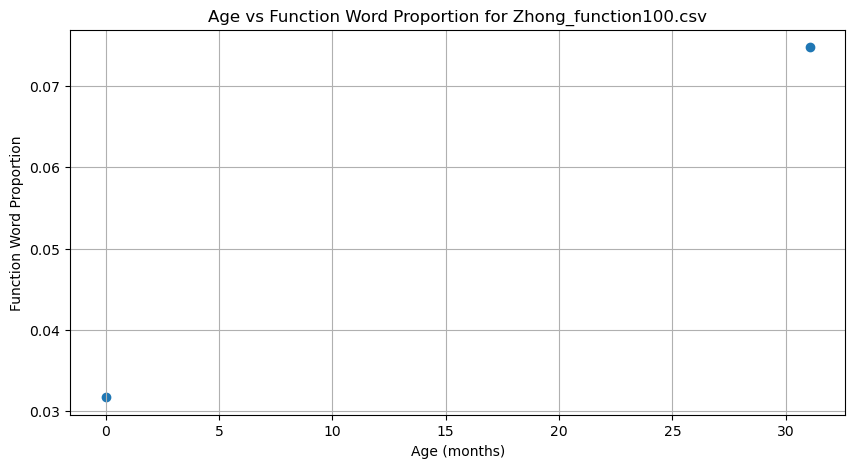

Spearman's rho for Zhong_function100.csv: 1.0000

Chosen Transcripts for Zhong_function100.csv: 
 ['01.ipcore-100.cex', '02.ipcore-100.cex'] 

Function Word Proportions for Zhong_function100.csv: 
 [0.03170028818443804, 0.07479224376731301] 

Ages for Zhong_function100.csv: 
 [0, 31.066666666666666] 

Time Steps for Zhong_function100.csv: 
 [31.066666666666666] 



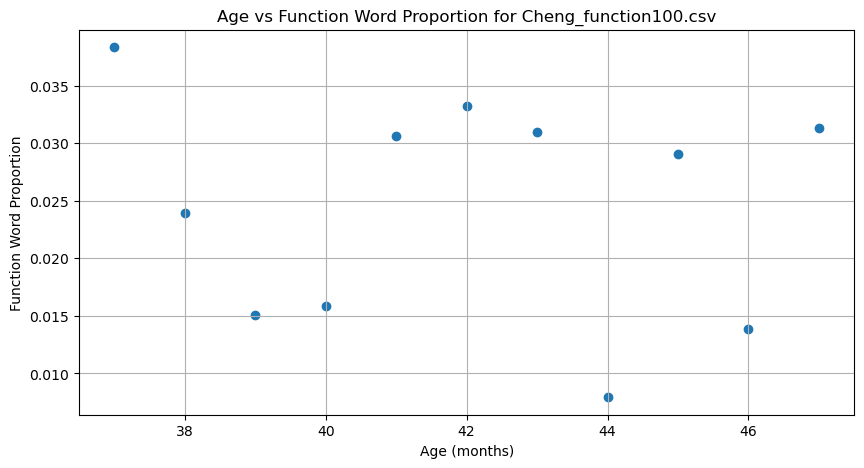

Spearman's rho for Cheng_function100.csv: -0.1636

Chosen Transcripts for Cheng_function100.csv: 
 ['030100.ipcore-100.cex', '030200.ipcore-100.cex', '030300.ipcore-100.cex', '030400.ipcore-100.cex', '030500.ipcore-100.cex', '030600.ipcore-100.cex', '030700.ipcore-100.cex', '030800.ipcore-100.cex', '030900.ipcore-100.cex', '031000.ipcore-100.cex', '031100.ipcore-100.cex'] 

Function Word Proportions for Cheng_function100.csv: 
 [0.038338658146964855, 0.023936170212765957, 0.015105740181268883, 0.015822784810126583, 0.03064066852367688, 0.0332409972299169, 0.030985915492957747, 0.007936507936507936, 0.029023746701846966, 0.013888888888888888, 0.03133903133903134] 

Ages for Cheng_function100.csv: 
 [37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0] 

Time Steps for Cheng_function100.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



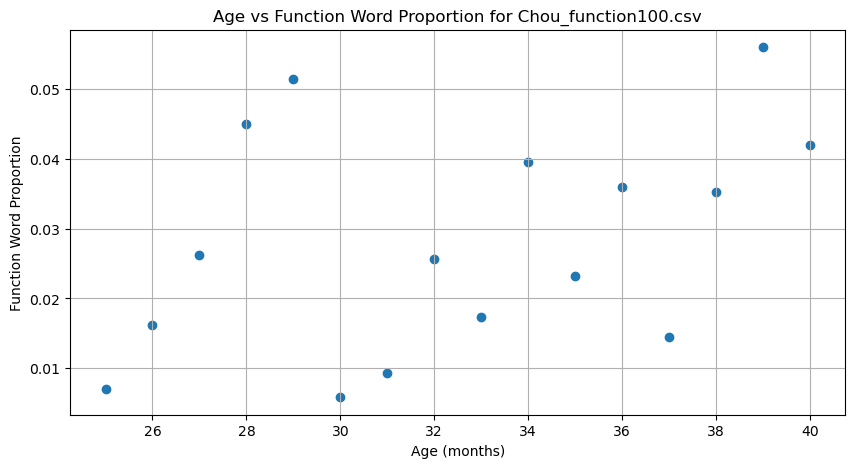

Spearman's rho for Chou_function100.csv: 0.3765

Chosen Transcripts for Chou_function100.csv: 
 ['020100.ipcore-100.cex', '020200.ipcore-100.cex', '020300.ipcore-100.cex', '020400.ipcore-100.cex', '020500.ipcore-100.cex', '020600.ipcore-100.cex', '020700.ipcore-100.cex', '020800.ipcore-100.cex', '020900.ipcore-100.cex', '021000.ipcore-100.cex', '021100.ipcore-100.cex', '030000.ipcore-100.cex', '030100.ipcore-100.cex', '030200.ipcore-100.cex', '030300.ipcore-100.cex', '030400.ipcore-100.cex'] 

Function Word Proportions for Chou_function100.csv: 
 [0.007067137809187279, 0.016181229773462782, 0.02622950819672131, 0.04507042253521127, 0.051515151515151514, 0.0058309037900874635, 0.009375, 0.02564102564102564, 0.017341040462427744, 0.03954802259887006, 0.023255813953488372, 0.03591160220994475, 0.01440922190201729, 0.03523035230352303, 0.056022408963585436, 0.04199475065616798] 

Ages for Chou_function100.csv: 
 [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0,

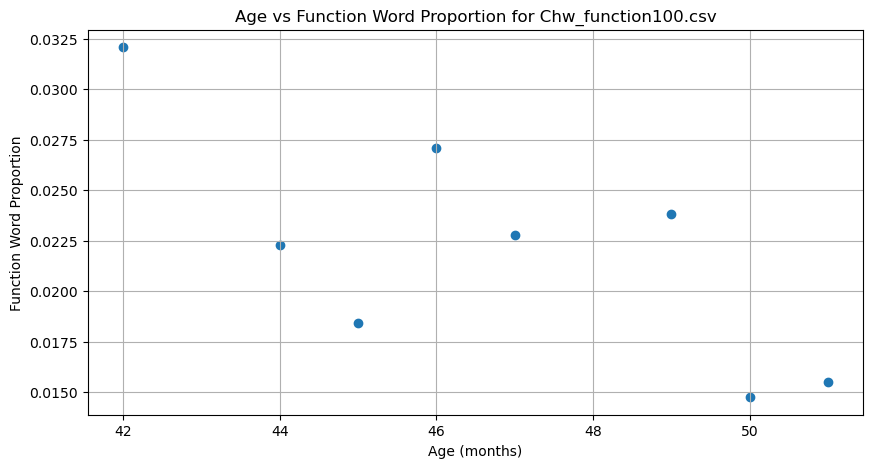

Spearman's rho for Chw_function100.csv: -0.5952

Chosen Transcripts for Chw_function100.csv: 
 ['030600.ipcore-100.cex', '030800.ipcore-100.cex', '030900.ipcore-100.cex', '031000.ipcore-100.cex', '031100.ipcore-100.cex', '040100.ipcore-100.cex', '040200.ipcore-100.cex', '040300.ipcore-100.cex'] 

Function Word Proportions for Chw_function100.csv: 
 [0.03206997084548105, 0.022284122562674095, 0.018421052631578946, 0.02710027100271003, 0.022792022792022793, 0.023809523809523808, 0.014749262536873156, 0.015479876160990712] 

Ages for Chw_function100.csv: 
 [42.0, 44.0, 45.0, 46.0, 47.0, 49.0, 50.0, 51.0] 

Time Steps for Chw_function100.csv: 
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0] 



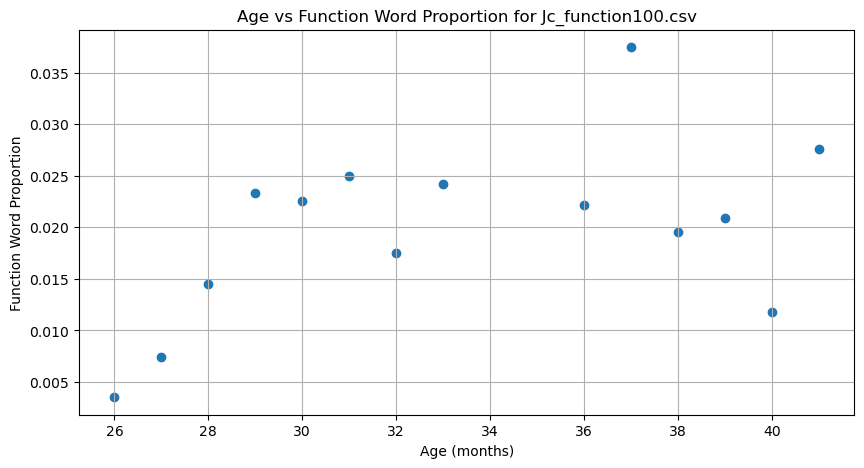

Spearman's rho for Jc_function100.csv: 0.4066

Chosen Transcripts for Jc_function100.csv: 
 ['020200.ipcore-100.cex', '020300.ipcore-100.cex', '020400.ipcore-100.cex', '020500.ipcore-100.cex', '020600.ipcore-100.cex', '020700.ipcore-100.cex', '020800.ipcore-100.cex', '020900.ipcore-100.cex', '030000.ipcore-100.cex', '030100.ipcore-100.cex', '030200.ipcore-100.cex', '030300.ipcore-100.cex', '030400.ipcore-100.cex', '030500.ipcore-100.cex'] 

Function Word Proportions for Jc_function100.csv: 
 [0.0035211267605633804, 0.007462686567164179, 0.014492753623188406, 0.023333333333333334, 0.02258064516129032, 0.025, 0.017543859649122806, 0.02416918429003021, 0.02214022140221402, 0.037463976945244955, 0.019553072625698324, 0.020895522388059702, 0.011764705882352941, 0.027624309392265192] 

Ages for Jc_function100.csv: 
 [26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0] 

Time Steps for Jc_function100.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0

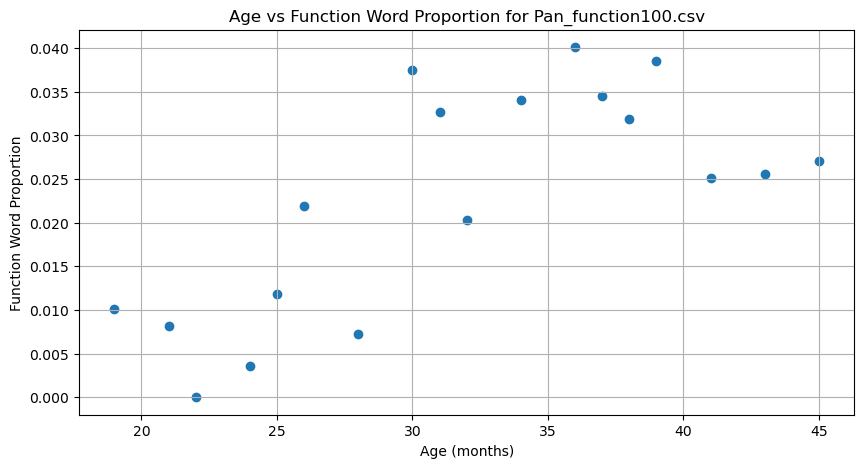

Spearman's rho for Pan_function100.csv: 0.6471

Chosen Transcripts for Pan_function100.csv: 
 ['010700.ipcore-100.cex', '010900.ipcore-100.cex', '011000.ipcore-100.cex', '020000.ipcore-100.cex', '020100.ipcore-100.cex', '020200.ipcore-100.cex', '020400.ipcore-100.cex', '020600.ipcore-100.cex', '020700.ipcore-100.cex', '020800.ipcore-100.cex', '021000.ipcore-100.cex', '030000.ipcore-100.cex', '030100.ipcore-100.cex', '030200.ipcore-100.cex', '030300.ipcore-100.cex', '030500.ipcore-100.cex', '030700.ipcore-100.cex', '030900.ipcore-100.cex'] 

Function Word Proportions for Pan_function100.csv: 
 [0.010101010101010102, 0.008130081300813009, 0.0, 0.0035714285714285713, 0.011857707509881422, 0.0219435736677116, 0.007246376811594203, 0.03753351206434316, 0.032679738562091505, 0.02030456852791878, 0.03409090909090909, 0.040106951871657755, 0.034574468085106384, 0.03183023872679045, 0.03856749311294766, 0.025069637883008356, 0.025559105431309903, 0.02702702702702703] 

Ages for Pan_function100.

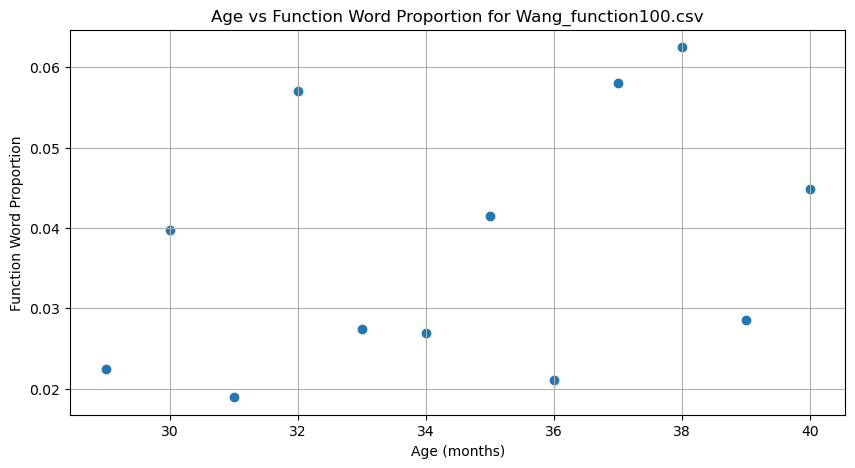

Spearman's rho for Wang_function100.csv: 0.4685

Chosen Transcripts for Wang_function100.csv: 
 ['020500.ipcore-100.cex', '020600.ipcore-100.cex', '020700.ipcore-100.cex', '020800.ipcore-100.cex', '020900.ipcore-100.cex', '021000.ipcore-100.cex', '021100.ipcore-100.cex', '030000.ipcore-100.cex', '030100.ipcore-100.cex', '030200.ipcore-100.cex', '030300.ipcore-100.cex', '030400.ipcore-100.cex'] 

Function Word Proportions for Wang_function100.csv: 
 [0.02247191011235955, 0.03978779840848806, 0.01891891891891892, 0.057065217391304345, 0.027472527472527472, 0.02694610778443114, 0.04145077720207254, 0.021052631578947368, 0.05804749340369393, 0.0625, 0.02849002849002849, 0.04481792717086835] 

Ages for Wang_function100.csv: 
 [29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0] 

Time Steps for Wang_function100.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



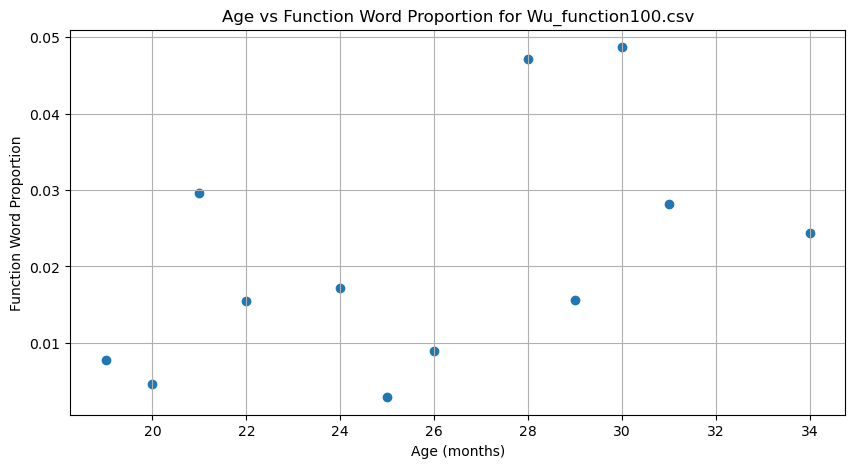

Spearman's rho for Wu_function100.csv: 0.5315

Chosen Transcripts for Wu_function100.csv: 
 ['010700.ipcore-100.cex', '010800.ipcore-100.cex', '010900.ipcore-100.cex', '011000.ipcore-100.cex', '020000.ipcore-100.cex', '020100.ipcore-100.cex', '020200.ipcore-100.cex', '020400.ipcore-100.cex', '020500.ipcore-100.cex', '020600.ipcore-100.cex', '020700.ipcore-100.cex', '021000.ipcore-100.cex'] 

Function Word Proportions for Wu_function100.csv: 
 [0.0078125, 0.004651162790697674, 0.029585798816568046, 0.015527950310559006, 0.017241379310344827, 0.0028735632183908046, 0.008982035928143712, 0.04722222222222222, 0.015665796344647518, 0.04871060171919771, 0.028169014084507043, 0.024324324324324326] 

Ages for Wu_function100.csv: 
 [19.0, 20.0, 21.0, 22.0, 24.0, 25.0, 26.0, 28.0, 29.0, 30.0, 31.0, 34.0] 

Time Steps for Wu_function100.csv: 
 [1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0] 



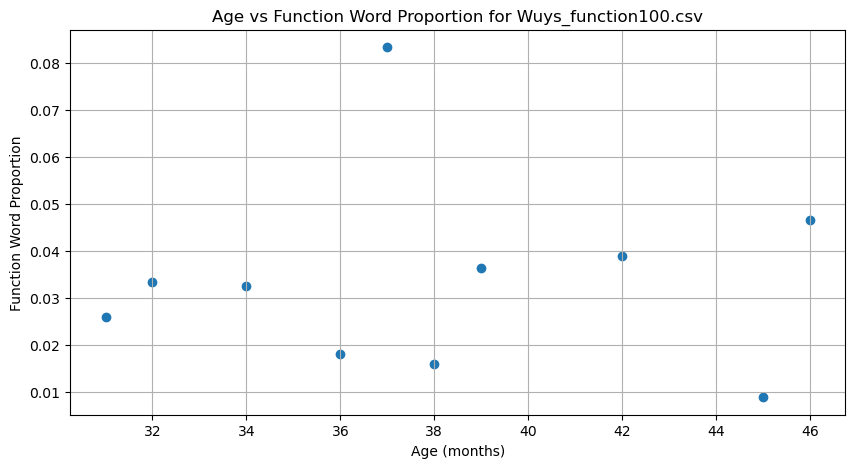

Spearman's rho for Wuys_function100.csv: 0.1758

Chosen Transcripts for Wuys_function100.csv: 
 ['020700.ipcore-100.cex', '020800.ipcore-100.cex', '021000.ipcore-100.cex', '030000.ipcore-100.cex', '030100.ipcore-100.cex', '030200.ipcore-100.cex', '030300.ipcore-100.cex', '030600.ipcore-100.cex', '030900.ipcore-100.cex', '031000.ipcore-100.cex'] 

Function Word Proportions for Wuys_function100.csv: 
 [0.026041666666666668, 0.03350515463917526, 0.032520325203252036, 0.01818181818181818, 0.08333333333333333, 0.0160857908847185, 0.036414565826330535, 0.03888888888888889, 0.008955223880597015, 0.046703296703296704] 

Ages for Wuys_function100.csv: 
 [31.0, 32.0, 34.0, 36.0, 37.0, 38.0, 39.0, 42.0, 45.0, 46.0] 

Time Steps for Wuys_function100.csv: 
 [1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 3.0, 3.0, 1.0] 



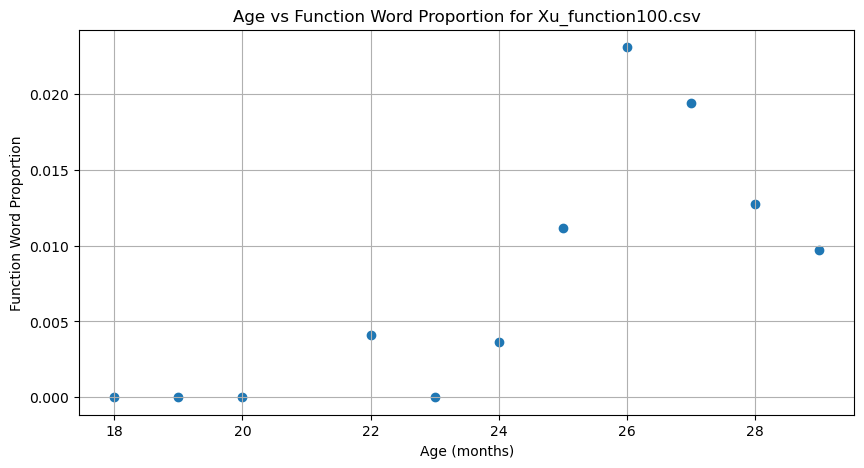

Spearman's rho for Xu_function100.csv: 0.8049

Chosen Transcripts for Xu_function100.csv: 
 ['010600.ipcore-100.cex', '010700.ipcore-100.cex', '010800.ipcore-100.cex', '011000.ipcore-100.cex', '011100.ipcore-100.cex', '020000.ipcore-100.cex', '020100.ipcore-100.cex', '020200.ipcore-100.cex', '020300.ipcore-100.cex', '020400.ipcore-100.cex', '020500.ipcore-100.cex'] 

Function Word Proportions for Xu_function100.csv: 
 [0.0, 0.0, 0.0, 0.004081632653061225, 0.0, 0.0036496350364963502, 0.011194029850746268, 0.0231023102310231, 0.019417475728155338, 0.012738853503184714, 0.009708737864077669] 

Ages for Xu_function100.csv: 
 [18.0, 19.0, 20.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0] 

Time Steps for Xu_function100.csv: 
 [1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



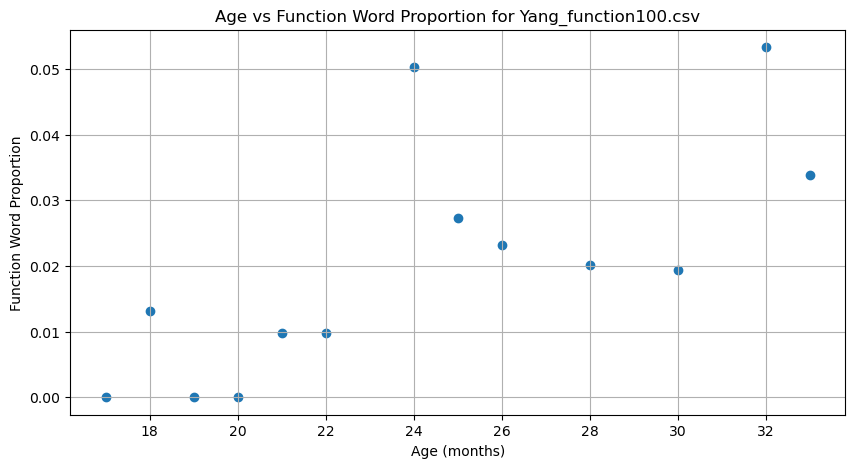

Spearman's rho for Yang_function100.csv: 0.7790

Chosen Transcripts for Yang_function100.csv: 
 ['010500.ipcore-100.cex', '010600.ipcore-100.cex', '010700.ipcore-100.cex', '010800.ipcore-100.cex', '010900.ipcore-100.cex', '011000.ipcore-100.cex', '020000.ipcore-100.cex', '020100.ipcore-100.cex', '020200.ipcore-100.cex', '020400.ipcore-100.cex', '020600.ipcore-100.cex', '020800.ipcore-100.cex', '020900.ipcore-100.cex'] 

Function Word Proportions for Yang_function100.csv: 
 [0.0, 0.013157894736842105, 0.0, 0.0, 0.009852216748768473, 0.00980392156862745, 0.050314465408805034, 0.027247956403269755, 0.023255813953488372, 0.020114942528735632, 0.019390581717451522, 0.05333333333333334, 0.03380281690140845] 

Ages for Yang_function100.csv: 
 [17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 25.0, 26.0, 28.0, 30.0, 32.0, 33.0] 

Time Steps for Yang_function100.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0] 



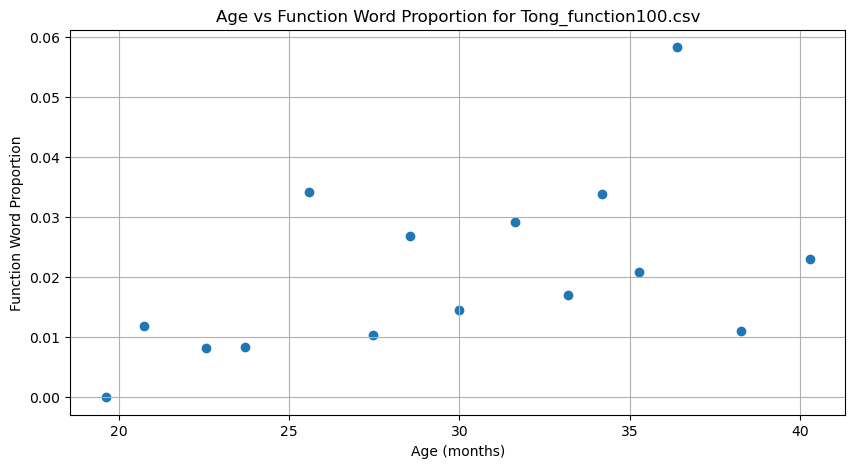

Spearman's rho for Tong_function100.csv: 0.5429

Chosen Transcripts for Tong_function100.csv: 
 ['010718.ipcore-100.cex', '010822.ipcore-100.cex', '011017.ipcore-100.cex', '011121.ipcore-100.cex', '020117.ipcore-100.cex', '020314.ipcore-100.cex', '020416.ipcore-100.cex', '020530.ipcore-100.cex', '020719.ipcore-100.cex', '020906.ipcore-100.cex', '021006.ipcore-100.cex', '021108.ipcore-100.cex', '030012.ipcore-100.cex', '030208.ipcore-100.cex', '030409.ipcore-100.cex'] 

Function Word Proportions for Tong_function100.csv: 
 [0.0, 0.011869436201780416, 0.008174386920980926, 0.008287292817679558, 0.034210526315789476, 0.010443864229765013, 0.026881720430107527, 0.014534883720930232, 0.029154518950437316, 0.017045454545454544, 0.03380281690140845, 0.020887728459530026, 0.058333333333333334, 0.011111111111111112, 0.02295918367346939] 

Ages for Tong_function100.csv: 
 [19.6, 20.733333333333334, 22.566666666666666, 23.7, 25.566666666666666, 27.46666666666667, 28.53333333333333, 30.0, 31.63333

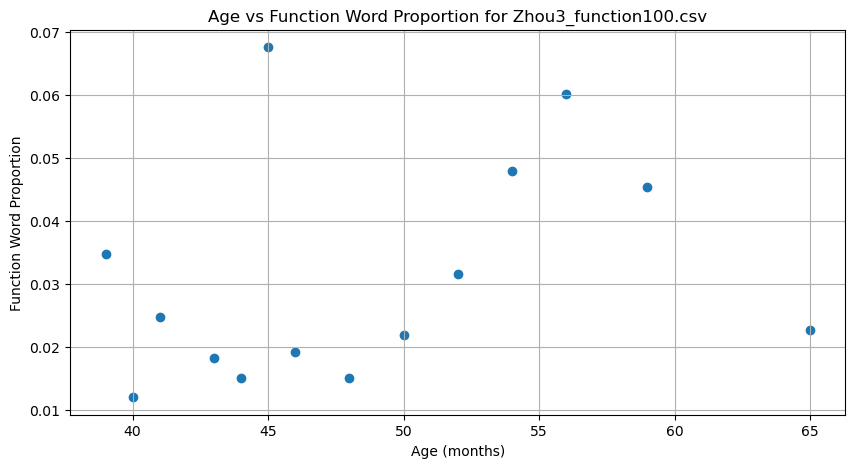

Spearman's rho for Zhou3_function100.csv: 0.3846

Chosen Transcripts for Zhou3_function100.csv: 
 ['000108.ipcore-100.cex', '000227.ipcore-100.cex', '000326.ipcore-100.cex', '000506.ipcore-100.cex', '000610.ipcore-100.cex', '000702.ipcore-100.cex', '000822.ipcore-100.cex', '001005.ipcore-100.cex', '001209.ipcore-100.cex', '010218.ipcore-100.cex', '010421.ipcore-100.cex', '010630.ipcore-100.cex', '010908.ipcore-100.cex', '020323.ipcore-100.cex'] 

Function Word Proportions for Zhou3_function100.csv: 
 [0.034666666666666665, 0.011976047904191617, 0.024657534246575342, 0.018276762402088774, 0.01507537688442211, 0.06756756756756757, 0.019178082191780823, 0.014962593516209476, 0.021798365122615803, 0.031578947368421054, 0.047979797979797977, 0.06015037593984962, 0.04534005037783375, 0.022613065326633167] 

Ages for Zhou3_function100.csv: 
 [39.0, 40.0, 41.0, 43.0, 44.0, 45.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 59.0, 65.0] 

Time Steps for Zhou3_function100.csv: 
 [1.0, 1.0, 2.0, 1.0, 1.0, 

In [18]:
age_function_plots(function_files_100, spearman_rhos_100, age_files)

## Age vs Function Word Proportion (All Utterances)

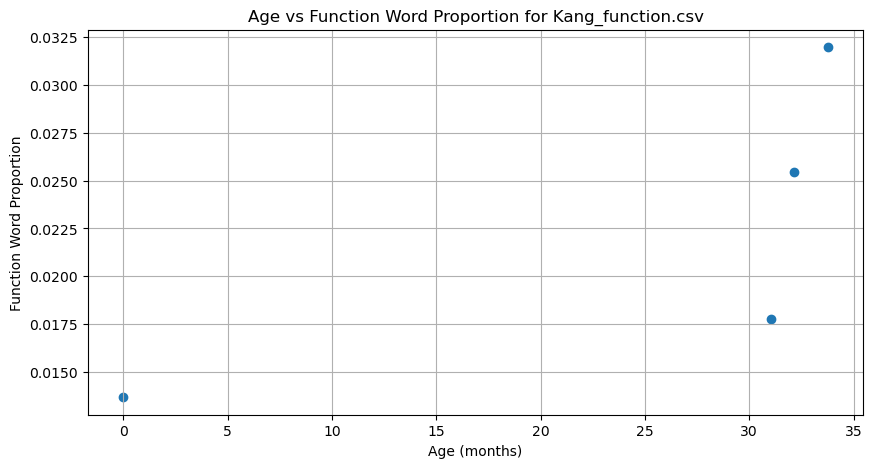

Spearman's rho for Kang_function.csv: 1.0000

Chosen Transcripts for Kang_function.csv: 
 ['01.cha', '02.cha', '19.cha', '21.cha'] 

Function Word Proportions for Kang_function.csv: 
 [0.013673655423883319, 0.017737485218762318, 0.02545885139135583, 0.03197158081705151] 

Ages for Kang_function.csv: 
 [0, 31.066666666666666, 32.13333333333333, 33.766666666666666] 

Time Steps for Kang_function.csv: 
 [31.066666666666666, 1.0666666666666664, 1.6333333333333329] 



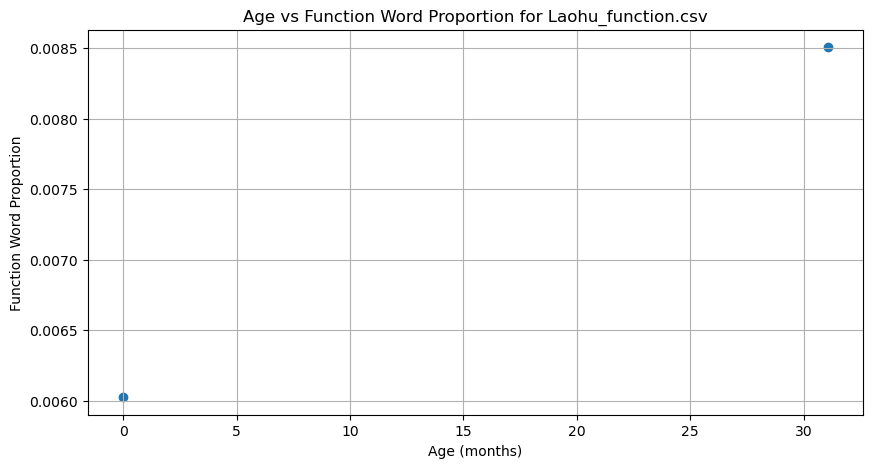

Spearman's rho for Laohu_function.csv: 1.0000

Chosen Transcripts for Laohu_function.csv: 
 ['01.cha', '02.cha'] 

Function Word Proportions for Laohu_function.csv: 
 [0.006024096385542169, 0.00850546780072904] 

Ages for Laohu_function.csv: 
 [0, 31.066666666666666] 

Time Steps for Laohu_function.csv: 
 [31.066666666666666] 



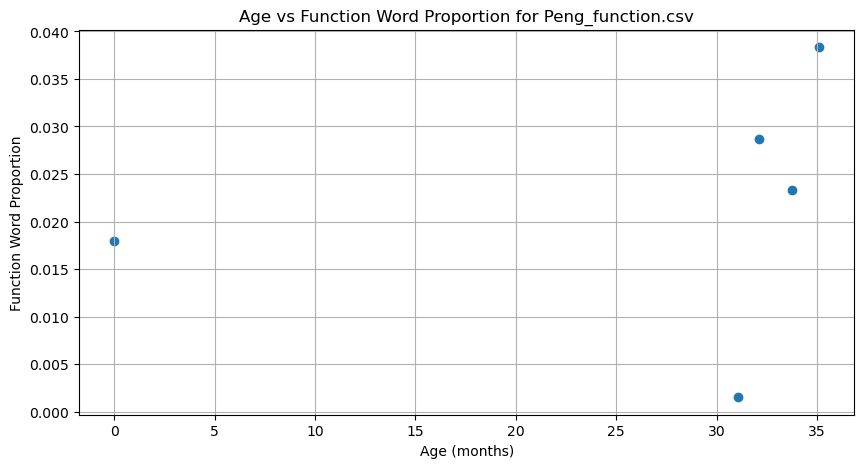

Spearman's rho for Peng_function.csv: 0.8000

Chosen Transcripts for Peng_function.csv: 
 ['01.cha', '02.cha', '19.cha', '21.cha', '24.cha'] 

Function Word Proportions for Peng_function.csv: 
 [0.01796875, 0.0015267175572519084, 0.0286368843069874, 0.02335858585858586, 0.0383356708742403] 

Ages for Peng_function.csv: 
 [0, 31.066666666666666, 32.13333333333333, 33.766666666666666, 35.1] 

Time Steps for Peng_function.csv: 
 [31.066666666666666, 1.0666666666666664, 1.6333333333333329, 1.3333333333333357] 



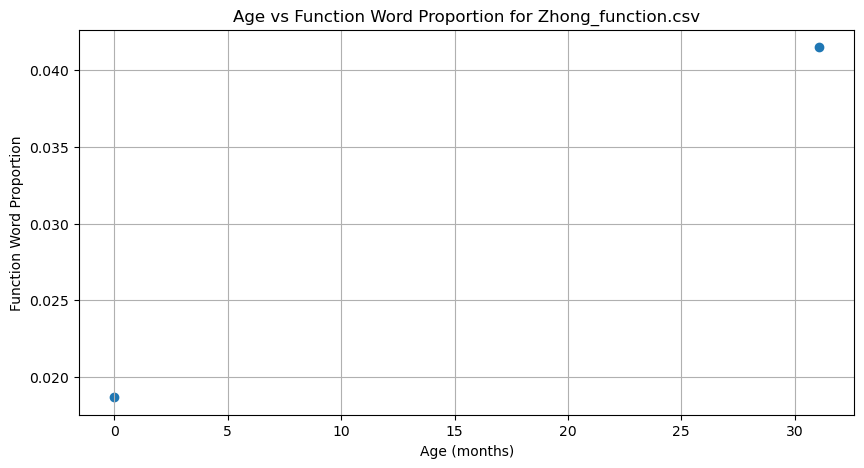

Spearman's rho for Zhong_function.csv: 1.0000

Chosen Transcripts for Zhong_function.csv: 
 ['01.cha', '02.cha'] 

Function Word Proportions for Zhong_function.csv: 
 [0.0186799501867995, 0.04149797570850203] 

Ages for Zhong_function.csv: 
 [0, 31.066666666666666] 

Time Steps for Zhong_function.csv: 
 [31.066666666666666] 



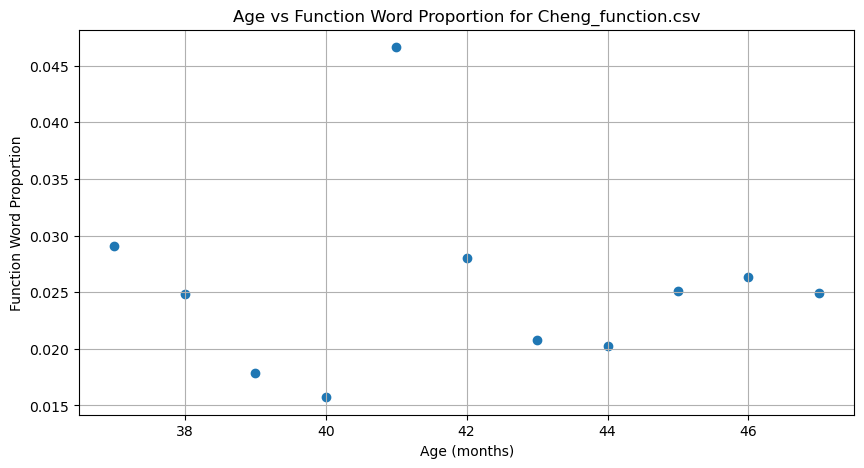

Spearman's rho for Cheng_function.csv: 0.0364

Chosen Transcripts for Cheng_function.csv: 
 ['030100.cha', '030200.cha', '030300.cha', '030400.cha', '030500.cha', '030600.cha', '030700.cha', '030800.cha', '030900.cha', '031000.cha', '031100.cha'] 

Function Word Proportions for Cheng_function.csv: 
 [0.029082774049217, 0.02481389578163772, 0.01782178217821782, 0.015727391874180863, 0.04661791590493602, 0.0280437756497948, 0.020766773162939296, 0.0202757502027575, 0.02511566424322538, 0.02631578947368421, 0.024922118380062305] 

Ages for Cheng_function.csv: 
 [37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0] 

Time Steps for Cheng_function.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



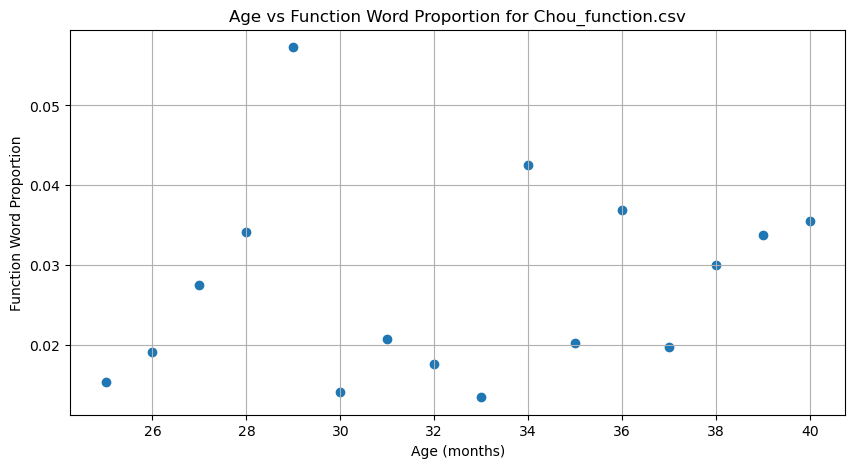

Spearman's rho for Chou_function.csv: 0.3147

Chosen Transcripts for Chou_function.csv: 
 ['020100.cha', '020200.cha', '020300.cha', '020400.cha', '020500.cha', '020600.cha', '020700.cha', '020800.cha', '020900.cha', '021000.cha', '021100.cha', '030000.cha', '030100.cha', '030200.cha', '030300.cha', '030400.cha'] 

Function Word Proportions for Chou_function.csv: 
 [0.015384615384615385, 0.019173157579388856, 0.027582159624413145, 0.03420523138832998, 0.05728643216080402, 0.014184397163120567, 0.0208078335373317, 0.017587939698492462, 0.013480392156862746, 0.0425764192139738, 0.020278833967046894, 0.03696098562628337, 0.019743336623889437, 0.030020703933747412, 0.03372434017595308, 0.03559870550161812] 

Ages for Chou_function.csv: 
 [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0] 

Time Steps for Chou_function.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



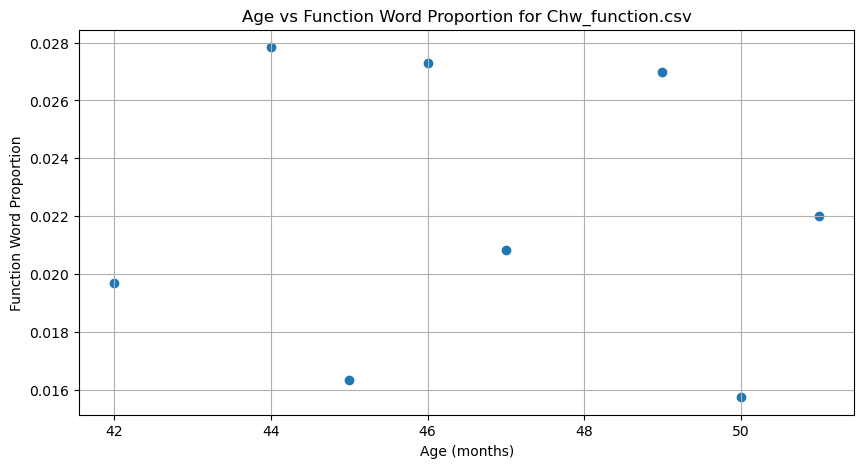

Spearman's rho for Chw_function.csv: -0.1429

Chosen Transcripts for Chw_function.csv: 
 ['030600.cha', '030800.cha', '030900.cha', '031000.cha', '031100.cha', '040100.cha', '040200.cha', '040300.cha'] 

Function Word Proportions for Chw_function.csv: 
 [0.019686621132985135, 0.027837259100642397, 0.01633605600933489, 0.027285129604365622, 0.020833333333333332, 0.02699228791773779, 0.015748031496062992, 0.02200825309491059] 

Ages for Chw_function.csv: 
 [42.0, 44.0, 45.0, 46.0, 47.0, 49.0, 50.0, 51.0] 

Time Steps for Chw_function.csv: 
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0] 



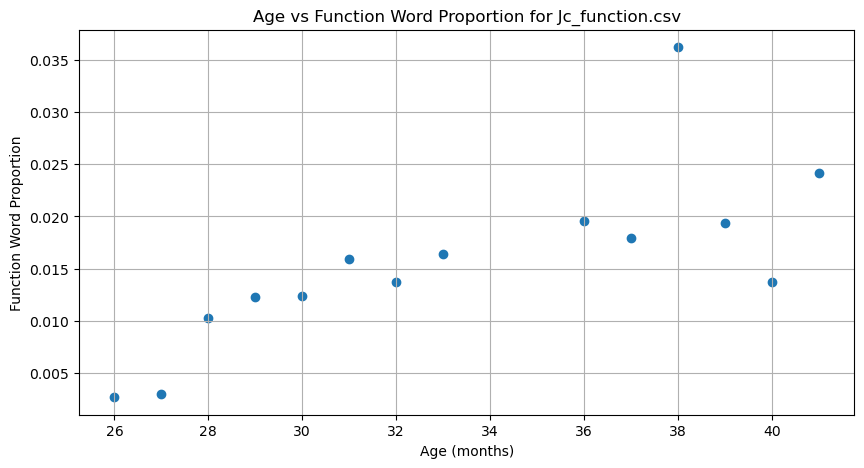

Spearman's rho for Jc_function.csv: 0.8374

Chosen Transcripts for Jc_function.csv: 
 ['020200.cha', '020300.cha', '020400.cha', '020500.cha', '020600.cha', '020700.cha', '020800.cha', '020900.cha', '030000.cha', '030100.cha', '030200.cha', '030300.cha', '030400.cha', '030500.cha'] 

Function Word Proportions for Jc_function.csv: 
 [0.0027124773960217, 0.0030425963488843813, 0.010273972602739725, 0.012292562999385371, 0.012440191387559809, 0.015932521087160263, 0.01376720901126408, 0.016414141414141416, 0.0196078431372549, 0.017921146953405017, 0.03618421052631579, 0.019372077488309953, 0.013728323699421965, 0.024114544084400905] 

Ages for Jc_function.csv: 
 [26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0] 

Time Steps for Jc_function.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



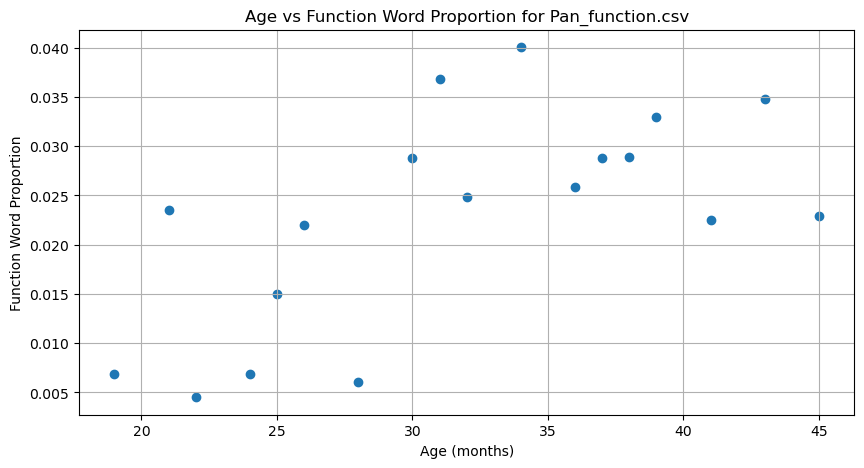

Spearman's rho for Pan_function.csv: 0.5831

Chosen Transcripts for Pan_function.csv: 
 ['010700.cha', '010900.cha', '011000.cha', '020000.cha', '020100.cha', '020200.cha', '020400.cha', '020600.cha', '020700.cha', '020800.cha', '021000.cha', '030000.cha', '030100.cha', '030200.cha', '030300.cha', '030500.cha', '030700.cha', '030900.cha'] 

Function Word Proportions for Pan_function.csv: 
 [0.006825938566552901, 0.02356902356902357, 0.004518072289156626, 0.0069124423963133645, 0.0149812734082397, 0.02204724409448819, 0.006060606060606061, 0.02882882882882883, 0.036855036855036855, 0.024844720496894408, 0.04004576659038902, 0.02585034013605442, 0.02878787878787879, 0.0289193302891933, 0.03292894280762565, 0.02247191011235955, 0.034782608695652174, 0.02295552367288379] 

Ages for Pan_function.csv: 
 [19.0, 21.0, 22.0, 24.0, 25.0, 26.0, 28.0, 30.0, 31.0, 32.0, 34.0, 36.0, 37.0, 38.0, 39.0, 41.0, 43.0, 45.0] 

Time Steps for Pan_function.csv: 
 [2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0,

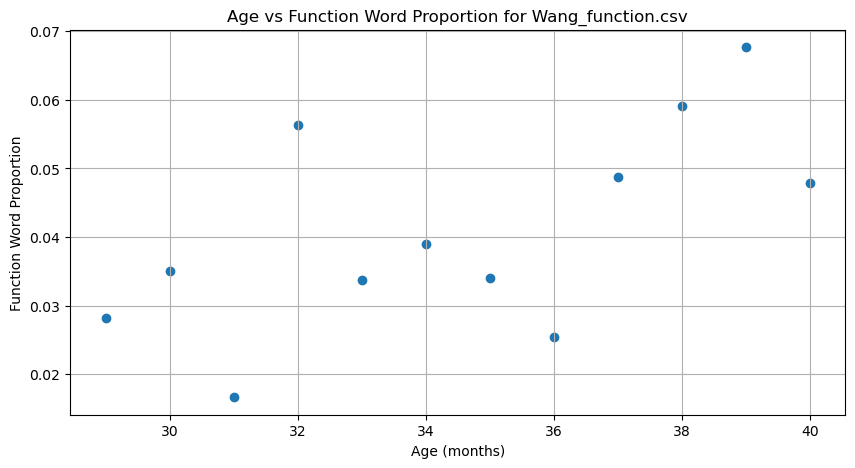

Spearman's rho for Wang_function.csv: 0.5804

Chosen Transcripts for Wang_function.csv: 
 ['020500.cha', '020600.cha', '020700.cha', '020800.cha', '020900.cha', '021000.cha', '021100.cha', '030000.cha', '030100.cha', '030200.cha', '030300.cha', '030400.cha'] 

Function Word Proportions for Wang_function.csv: 
 [0.028181041844577284, 0.03504043126684636, 0.016666666666666666, 0.0563564875491481, 0.033707865168539325, 0.03894297635605007, 0.03402854006586169, 0.025423728813559324, 0.048728813559322036, 0.059154929577464786, 0.06766917293233082, 0.047933884297520664] 

Ages for Wang_function.csv: 
 [29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0] 

Time Steps for Wang_function.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



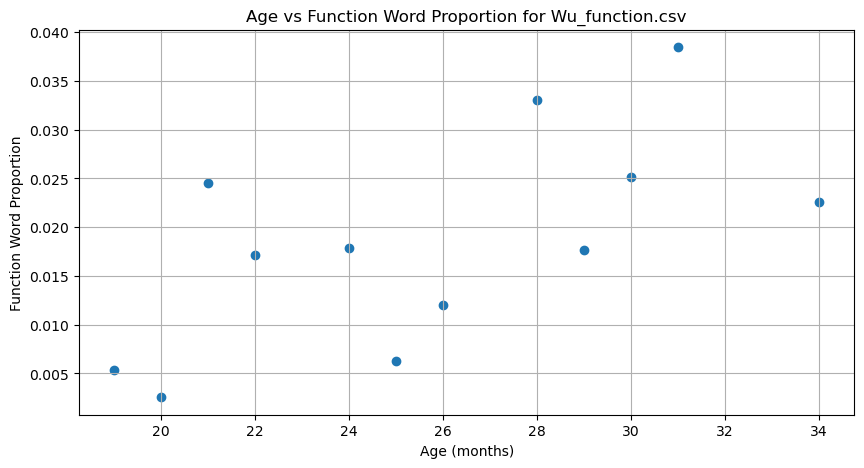

Spearman's rho for Wu_function.csv: 0.6643

Chosen Transcripts for Wu_function.csv: 
 ['010700.cha', '010800.cha', '010900.cha', '011000.cha', '020000.cha', '020100.cha', '020200.cha', '020400.cha', '020500.cha', '020600.cha', '020700.cha', '021000.cha'] 

Function Word Proportions for Wu_function.csv: 
 [0.005333333333333333, 0.002564102564102564, 0.024549918166939442, 0.0171875, 0.01782178217821782, 0.006297229219143577, 0.012032085561497326, 0.03309481216457961, 0.01762114537444934, 0.02515177797051171, 0.038461538461538464, 0.022556390977443608] 

Ages for Wu_function.csv: 
 [19.0, 20.0, 21.0, 22.0, 24.0, 25.0, 26.0, 28.0, 29.0, 30.0, 31.0, 34.0] 

Time Steps for Wu_function.csv: 
 [1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0] 



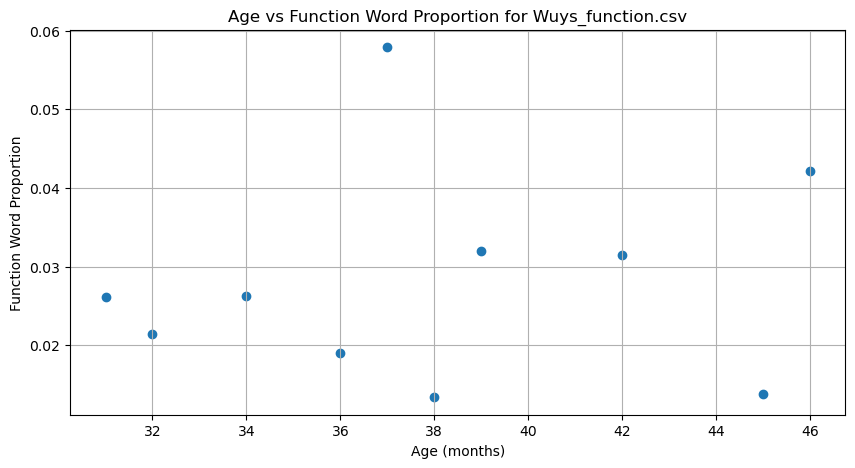

Spearman's rho for Wuys_function.csv: 0.2000

Chosen Transcripts for Wuys_function.csv: 
 ['020700.cha', '020800.cha', '021000.cha', '030000.cha', '030100.cha', '030200.cha', '030300.cha', '030600.cha', '030900.cha', '031000.cha'] 

Function Word Proportions for Wuys_function.csv: 
 [0.02617801047120419, 0.02147239263803681, 0.026239067055393587, 0.018957345971563982, 0.057902973395931145, 0.013377926421404682, 0.032, 0.031525851197982346, 0.013779527559055118, 0.04212454212454213] 

Ages for Wuys_function.csv: 
 [31.0, 32.0, 34.0, 36.0, 37.0, 38.0, 39.0, 42.0, 45.0, 46.0] 

Time Steps for Wuys_function.csv: 
 [1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 3.0, 3.0, 1.0] 



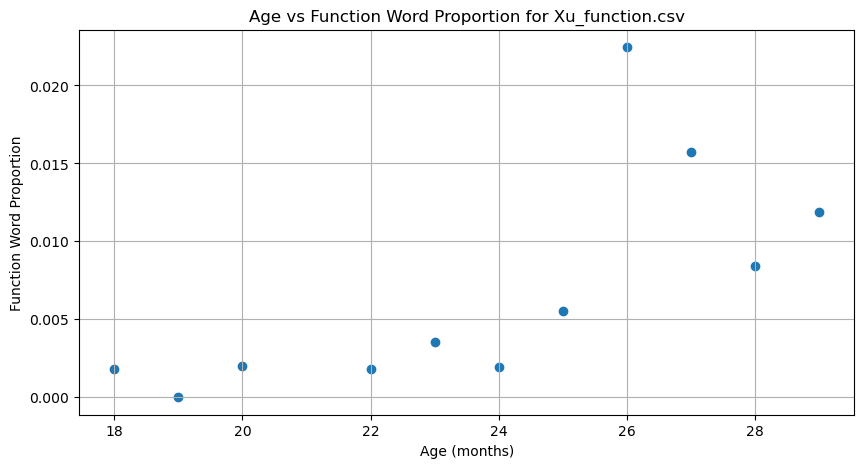

Spearman's rho for Xu_function.csv: 0.8636

Chosen Transcripts for Xu_function.csv: 
 ['010600.cha', '010700.cha', '010800.cha', '011000.cha', '011100.cha', '020000.cha', '020100.cha', '020200.cha', '020300.cha', '020400.cha', '020500.cha'] 

Function Word Proportions for Xu_function.csv: 
 [0.0018099547511312218, 0.0, 0.002012072434607646, 0.0018181818181818182, 0.0035149384885764497, 0.0019157088122605363, 0.005504587155963303, 0.02245508982035928, 0.015706806282722512, 0.008403361344537815, 0.011884550084889643] 

Ages for Xu_function.csv: 
 [18.0, 19.0, 20.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0] 

Time Steps for Xu_function.csv: 
 [1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



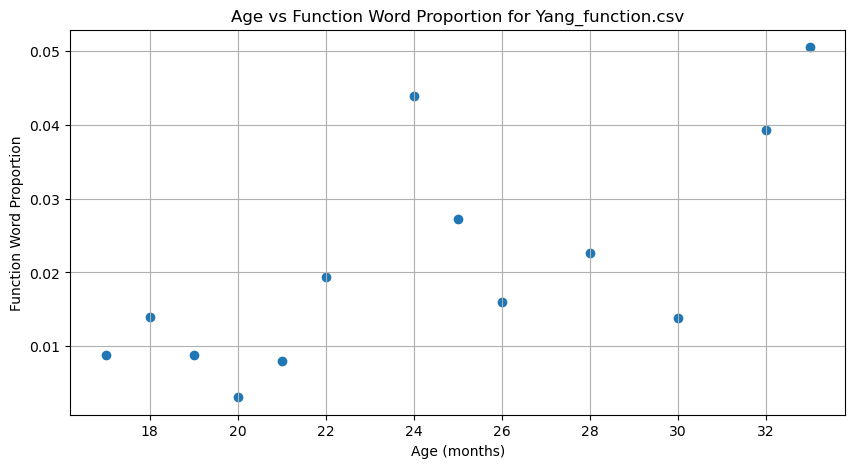

Spearman's rho for Yang_function.csv: 0.6868

Chosen Transcripts for Yang_function.csv: 
 ['010500.cha', '010600.cha', '010700.cha', '010800.cha', '010900.cha', '011000.cha', '020000.cha', '020100.cha', '020200.cha', '020400.cha', '020600.cha', '020800.cha', '020900.cha'] 

Function Word Proportions for Yang_function.csv: 
 [0.008827238335435058, 0.013969732246798603, 0.008862629246676515, 0.0030721966205837174, 0.007974481658692184, 0.019390581717451522, 0.043936731107205626, 0.02729044834307992, 0.016055045871559634, 0.02263374485596708, 0.013824884792626729, 0.039316239316239315, 0.05056179775280899] 

Ages for Yang_function.csv: 
 [17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 25.0, 26.0, 28.0, 30.0, 32.0, 33.0] 

Time Steps for Yang_function.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0] 



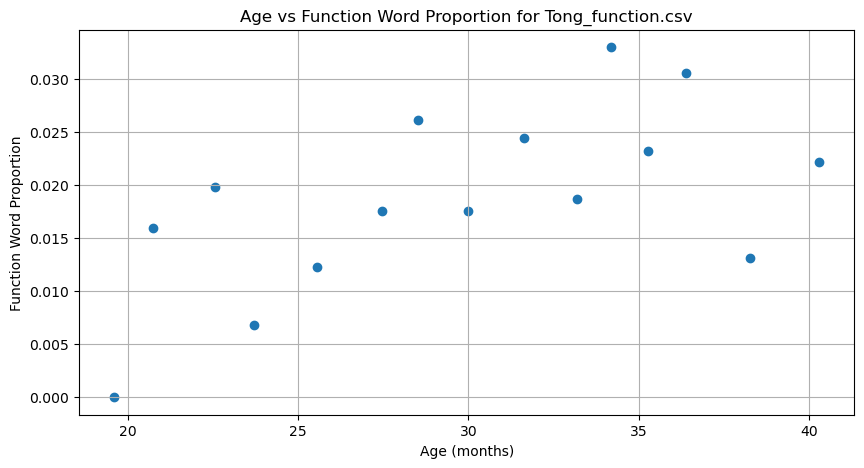

Spearman's rho for Tong_function.csv: 0.5607

Chosen Transcripts for Tong_function.csv: 
 ['010718.cha', '010822.cha', '011017.cha', '011121.cha', '020117.cha', '020314.cha', '020416.cha', '020530.cha', '020719.cha', '020906.cha', '021006.cha', '021108.cha', '030012.cha', '030208.cha', '030409.cha'] 

Function Word Proportions for Tong_function.csv: 
 [0.0, 0.015931372549019607, 0.019815994338287332, 0.006823821339950372, 0.0122306348281887, 0.0175, 0.026091888825865002, 0.01751927119831815, 0.024405125076266018, 0.018674136321195144, 0.03296703296703297, 0.02315661182205972, 0.030502392344497607, 0.013097072419106317, 0.022146507666098807] 

Ages for Tong_function.csv: 
 [19.6, 20.733333333333334, 22.566666666666666, 23.7, 25.566666666666666, 27.46666666666667, 28.53333333333333, 30.0, 31.633333333333333, 33.2, 34.2, 35.266666666666666, 36.4, 38.266666666666666, 40.3] 

Time Steps for Tong_function.csv: 
 [1.1333333333333329, 1.8333333333333321, 1.1333333333333329, 1.8666666666666671,

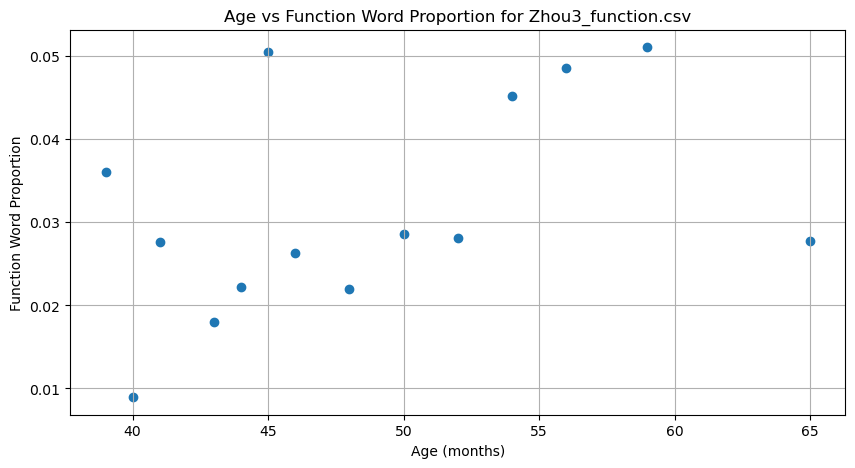

Spearman's rho for Zhou3_function.csv: 0.4989

Chosen Transcripts for Zhou3_function.csv: 
 ['000108.cha', '000227.cha', '000326.cha', '000506.cha', '000610.cha', '000702.cha', '000822.cha', '001005.cha', '001209.cha', '010218.cha', '010421.cha', '010630.cha', '010908.cha', '020323.cha'] 

Function Word Proportions for Zhou3_function.csv: 
 [0.036036036036036036, 0.008948545861297539, 0.02763819095477387, 0.018050541516245487, 0.022242817423540315, 0.05051369863013699, 0.02633969118982743, 0.02198952879581152, 0.028539451594851706, 0.028122415219189414, 0.0451527224435591, 0.048616305160807775, 0.051070840197693576, 0.027716994894237783] 

Ages for Zhou3_function.csv: 
 [39.0, 40.0, 41.0, 43.0, 44.0, 45.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 59.0, 65.0] 

Time Steps for Zhou3_function.csv: 
 [1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 6.0] 



In [19]:
age_function_plots(function_files_all, spearman_rhos_all, age_files)

## Spearman's ρ

In [20]:
spearman_rhos_50

[['Kang_function50.csv', 0.39999999999999997],
 ['Laohu_function50.csv', -0.9999999999999999],
 ['Peng_function50.csv', 0.3],
 ['Zhong_function50.csv', 0.9999999999999999],
 ['Cheng_function50.csv', 0.27272727272727276],
 ['Chou_function50.csv', 0.6088235294117647],
 ['Chw_function50.csv', -0.5952380952380953],
 ['Jc_function50.csv', 0.3758241758241759],
 ['Pan_function50.csv', 0.4581188702238186],
 ['Wang_function50.csv', 0.4685314685314686],
 ['Wu_function50.csv', 0.6690027772631207],
 ['Wuys_function50.csv', 0.29696969696969694],
 ['Xu_function50.csv', 0.5815526314990442],
 ['Yang_function50.csv', 0.4364707498867656],
 ['Tong_function50.csv', 0.6940977116980984],
 ['Zhou3_function50.csv', 0.2948296613559737]]

In [21]:
spearman_rhos_100

[['Kang_function100.csv', -0.7999999999999999],
 ['Laohu_function100.csv', 0.9999999999999999],
 ['Peng_function100.csv', 0.39999999999999997],
 ['Zhong_function100.csv', 0.9999999999999999],
 ['Cheng_function100.csv', -0.16363636363636366],
 ['Chou_function100.csv', 0.3764705882352941],
 ['Chw_function100.csv', -0.5952380952380953],
 ['Jc_function100.csv', 0.4065934065934066],
 ['Pan_function100.csv', 0.6470588235294118],
 ['Wang_function100.csv', 0.4685314685314686],
 ['Wu_function100.csv', 0.5314685314685316],
 ['Wuys_function100.csv', 0.17575757575757575],
 ['Xu_function100.csv', 0.8048688419946773],
 ['Yang_function100.csv', 0.7790174143548602],
 ['Tong_function100.csv', 0.5428571428571428],
 ['Zhou3_function100.csv', 0.38461538461538464]]

In [22]:
spearman_rhos_all

[['Kang_function.csv', 1.0],
 ['Laohu_function.csv', 0.9999999999999999],
 ['Peng_function.csv', 0.7999999999999999],
 ['Zhong_function.csv', 0.9999999999999999],
 ['Cheng_function.csv', 0.03636363636363637],
 ['Chou_function.csv', 0.3147058823529411],
 ['Chw_function.csv', -0.14285714285714288],
 ['Jc_function.csv', 0.8373626373626375],
 ['Pan_function.csv', 0.5830753353973168],
 ['Wang_function.csv', 0.5804195804195805],
 ['Wu_function.csv', 0.6643356643356644],
 ['Wuys_function.csv', 0.19999999999999998],
 ['Xu_function.csv', 0.8636363636363636],
 ['Yang_function.csv', 0.6868131868131868],
 ['Tong_function.csv', 0.5607142857142856],
 ['Zhou3_function.csv', 0.49890109890109896]]